In [31]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import matplotlib.colors as mcolors


In [32]:
print(plt.style.available)
plt.style.use('seaborn-v0_8-dark-palette')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [33]:
def read_lines(file):
    with open(file, 'r') as fin:
        lines = fin.readlines()
    lines = [line.strip() for line in lines]
    return lines

def get_index_of(x, list):
    ret = -1
    for index, elem in enumerate(list):
        if x == elem:
            ret = index
    return ret

In [34]:
def plot_file(file,
              sep=',', 
              x='x', 
              ys=['y'], 
              labels=['E_DNA', 'E_Ideal'],
              xlabel='Time (hours)',
              ylabel='Concentration (nM)',
              linestyles=['solid','dashed'], 
              colors=mcolors.TABLEAU_COLORS,
              name=None,
              text=r'text',
              legendkwargs={},
              **kwargs,
             ):
    # Preprocess
    lines = read_lines(file)
    headers = lines[0].split()
    data = np.array([l.split() for l in lines[1:]])
    df = pd.DataFrame(data=data, columns=headers, dtype=np.float32)
    df['time'] /= 3600 # Convert to hours
    
    # Plot 
    for index, (color, y) in enumerate(zip(colors, ys)):
        plt.plot(x, y, data=df, label=labels[index], c=color, linestyle=linestyles[index], **kwargs)
        
    
    # Legend. CHANGE THIS FOR SOME PLOTS WITH LOT OF LEGEND TO BE OUTSIDE THE BOX
    plt.legend(**legendkwargs)
    
    # Setting xlabel and ylabel
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Get the directory
    DIR = os.path.dirname(file)
    filename = os.path.basename(file)
    
#     nameprefix = '' if prefix is None else prefix
    if name is None:
        plt.savefig(f"{os.path.join(DIR, filename)}.jpg", format="jpg", dpi=600, bbox_inches='tight', pad_inches=0)
        plt.savefig(f"{os.path.join(DIR, filename)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
    else:
        plt.savefig(f"{os.path.join(DIR, name)}.jpg", format="jpg", dpi=600, bbox_inches='tight', pad_inches=0)
        plt.savefig(f"{os.path.join(DIR, name)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
        print(f"{os.path.join(DIR, name)}.jpg")
    return df

In [35]:
def plot_file_advanced(file,
              sep=',', 
              x='x', 
              ys={'y':['y1', 'y2']}, 
              labels=['E_DNA', 'E_Ideal'],
              xlabel='Time (hours)',
              ylabel='Concentration (nM)',
              linestyles=['solid','dashed'], 
              colors=mcolors.TABLEAU_COLORS,
              name=None,
              text=r'text',
              legendkwargs={},
              **kwargs,
             ):
    # Preprocess
    lines = read_lines(file)
    headers = lines[0].split()
    print(headers)
    data = {}
    
    timeindex = get_index_of(x, headers)
    times = []
    for row, line in enumerate(lines[1:]):
        times.append(float(line.split()[0]))
    data[x] = times
    
    
    for key, vlist in ys.items():
        indices = [get_index_of(v, headers) for v in vlist]
        sum_np = np.zeros((len(lines)-1, len(vlist)))
        for row, line in enumerate(lines[1:]):
            for col, index in enumerate(indices):
                sum_np[row, col] = line.split()[index]
    
        sum_np = np.sum(sum_np, axis=-1)
        data[key] = sum_np
                       
    df = pd.DataFrame(data)
    
    df['time'] /= 3600 # Convert to hours
    
    # Plot 
    for index, (color, y) in enumerate(zip(colors, ys)):
        plt.plot(x, y, data=df, label=labels[index], c=color, linestyle=linestyles[index], **kwargs)
        
    
    # Legend. CHANGE THIS FOR SOME PLOTS WITH LOT OF LEGEND TO BE OUTSIDE THE BOX
    plt.legend(**legendkwargs)
    
    # Setting xlabel and ylabel
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Get the directory
    DIR = os.path.dirname(file)
    filename = os.path.basename(file)
    
#     nameprefix = '' if prefix is None else prefix
    if name is None:
        plt.savefig(f"{os.path.join(DIR, filename)}.jpg", format="jpg", dpi=600, bbox_inches='tight', pad_inches=0)
        plt.savefig(f"{os.path.join(DIR, filename)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
        
    else:
        plt.savefig(f"{os.path.join(DIR, name)}.jpg", format="jpg", dpi=600, bbox_inches='tight', pad_inches=0)
        plt.savefig(f"{os.path.join(DIR, name)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)

        print(f"{os.path.join(DIR, name)}.jpg")
    return df

In [36]:
def plot_file_dhelper(file,
              sep=',', 
              x='x', 
              ys=['HelperCCk'], 
              labels=['d[HelperCCk]/dt'],
              xlabel='Time (hours)',
              ylabel='Concentration (nM)',
              linestyles=['solid'], 
              colors=mcolors.TABLEAU_COLORS,
              name=None,
              text=r'text',
              legendkwargs={},
              **kwargs,
             ):
    # Preprocess
    lines = read_lines(file)
    headers = lines[0].split()
    data = np.array([l.split() for l in lines[1:]])
    df = pd.DataFrame(data=data, columns=headers, dtype=np.float32)
    df['time'] /= 3600 # Convert to hours
    
    for index, y in enumerate(ys):
        times = df['time'].copy()
        values = df[y].copy()
        dvalues = values.copy()
        for i in range(1, len(values)):
#             print(values[i], values[i-1], times[i], times[i-1])
            dvalues[i] = -(float(values[i])-float(values[i-1]))/(float(times[i])-float(times[i-1]))
            if dvalues[i] > 8:
                print(dvalues[i], values[i], values[i-1], times[i], times[i-1])
        dvalues[0] = dvalues[1]
        df[f'd{y}dt'] = dvalues.copy()
    df = df.drop(index=0)

    
    # Plot 
    for index, (color, y) in enumerate(zip(colors, ys)):
        plt.plot(x, f'd{y}dt', data=df, label=labels[index], c=color, linestyle=linestyles[index], **kwargs)
        
    
    # Legend. CHANGE THIS FOR SOME PLOTS WITH LOT OF LEGEND TO BE OUTSIDE THE BOX
    plt.legend(**legendkwargs)
    
    # Setting xlabel and ylabel
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Get the directory
    DIR = os.path.dirname(file)
    filename = os.path.basename(file)
    
#     nameprefix = '' if prefix is None else prefix
    if name is None:
        plt.savefig(f"{os.path.join(DIR, filename)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
    else:
        plt.savefig(f"{os.path.join(DIR, name)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
        print(f"{os.path.join(DIR, name)}.png")
    return df

['time', 'Cj', 'Ck', 'O1']


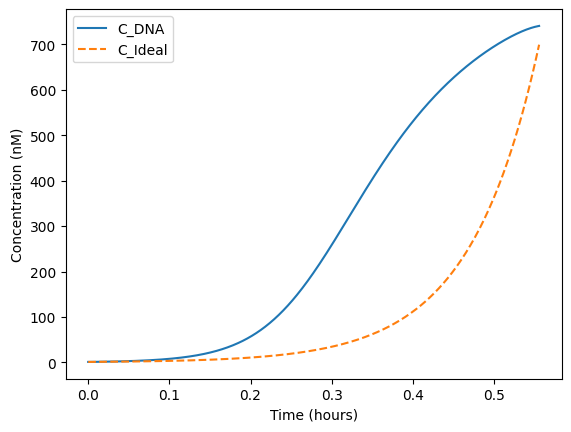

In [15]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/original/plots/original', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'O': ['O1']
               },
               labels=['C_DNA', 'C_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Cj', 'Ck', 'O1']


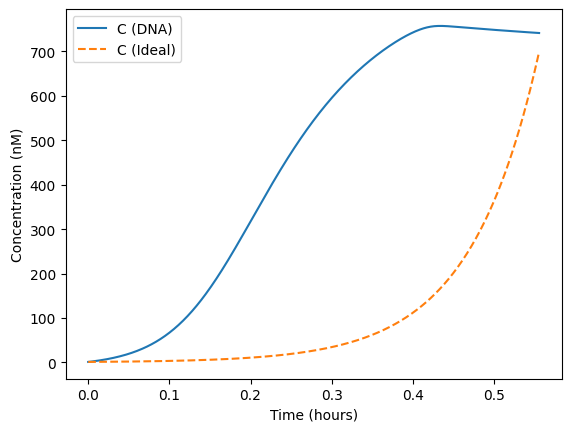

In [22]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/leaky/plots/leaky', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'O': ['O1']
               },
               labels=['C (DNA)', 'C (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Cj', 'Ck', 'O1']
['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC', 'ReactCBCj', 'O1']


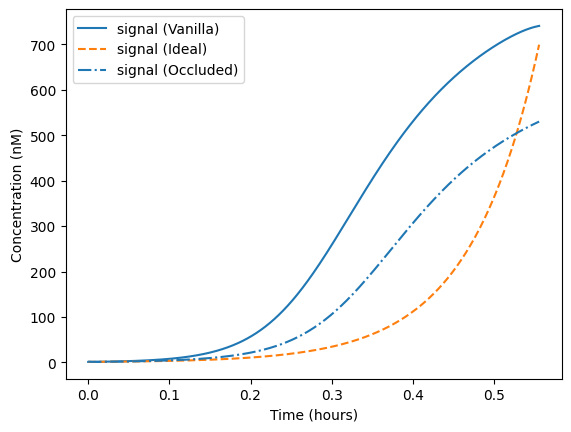

In [27]:
# Occluded
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/original/plots/original', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'O': ['O1']
               },
               labels=['signal (Vanilla)', 'signal (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/occluded/plots/occluded', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
#                    'shC': ['shCj', 'shCk'],
#                    'O': ['O1']
               },
               labels=['signal (Occluded)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashdot'],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Cj', 'Ck', 'shCj', 'shCk', 'CancelC', 'ReactCBCj', 'O1']


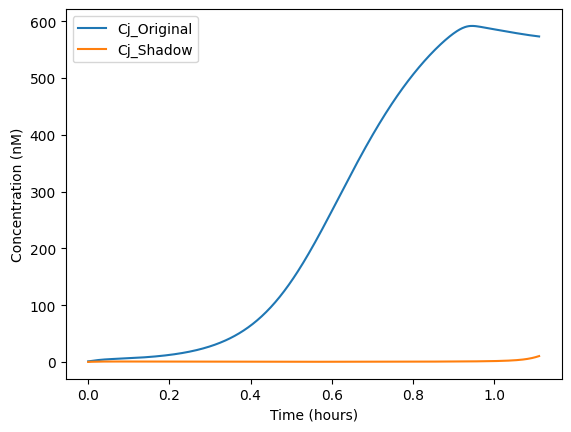

In [12]:
# With shadow cancellation
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'shC': ['shCj', 'shCk'],
#                    'O': ['O1']
               },
               labels=['Cj_Original', 'Cj_Shadow'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# Biamp

['time', 'Cj', 'Ck', 'Br', 'O1', 'O2']


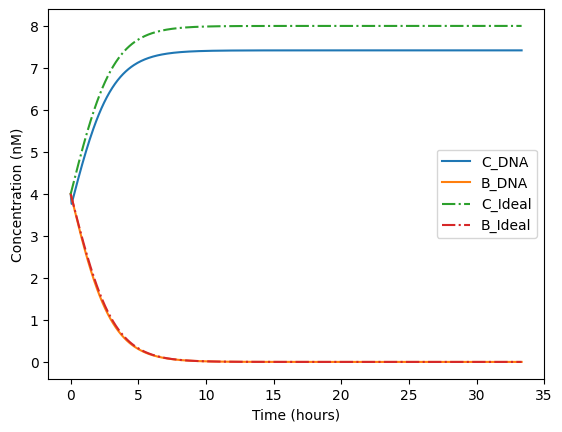

In [13]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/original/plots/original', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2': ['O2']
               },
               labels=['C_DNA', 'B_DNA', 'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid' ,'dashdot', 'dashdot'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'O1', 'O2']


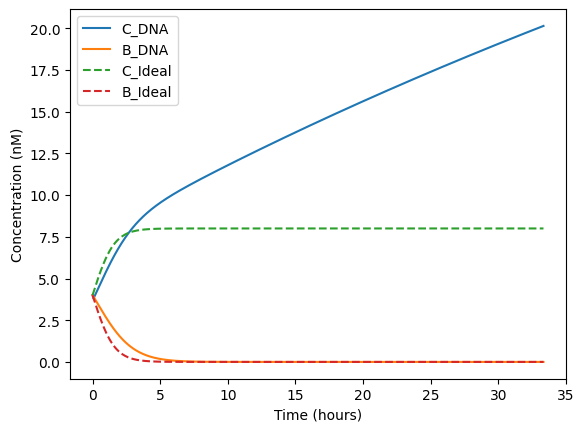

In [14]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/leaky/plots/leaky', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2': ['O2']
               },
               labels=['C_DNA', 'B_DNA', 'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid' ,'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


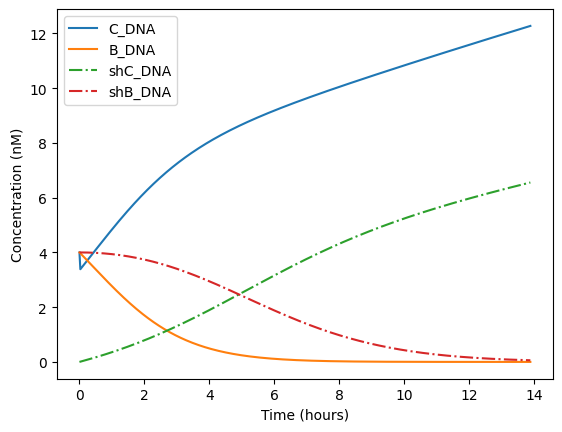

In [15]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/primary_shadow_nocancel/plots/leaky_shadow_nocancel', 
               x='time', 
                ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'shC': ['shCj', 'shCk'],
                   'shB': ['shBr'],
#                    'O1': ['O1'],
#                    'O2': ['O2']
               },
               labels=['C_DNA', 'B_DNA', 'shC_DNA', 'shB_DNA', 'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashdot', 'dashdot', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'O1', 'O2']


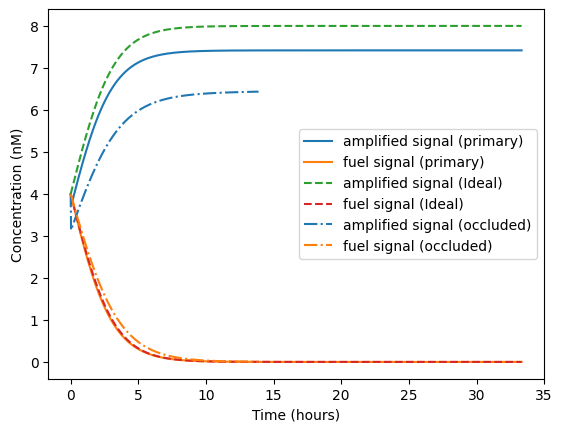

In [36]:
kwargs = {
}
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/original/plots/original', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2': ['O2']
               },
               labels=['amplified signal (primary)', 'fuel signal (primary)', 'amplified signal (Ideal)', 'fuel signal (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid' ,'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/occluded/plots/occluded', 
               x='time', 
                ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
#                    'shC': ['shCj', 'shCk'],
#                    'shB': ['shBr'],
               },
               labels=['amplified signal (occluded)', 'fuel signal (occluded)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashdot', 'dashdot'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


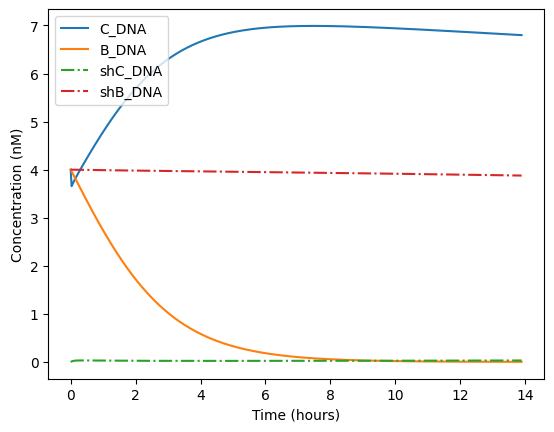

In [16]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/leaky_shadow/plots/leaky_shadow', 
               x='time', 
                ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'shC': ['shCj', 'shCk'],
                   'shB': ['shBr'],
#                    'O1': ['O1'],
#                    'O2': ['O2']
               },
               labels=['C_DNA', 'B_DNA', 'shC_DNA', 'shB_DNA', 'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashdot', 'dashdot', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

In [53]:
FOLDER='biamp_speed'

['time', 'Cj', 'Ck', 'Br', 'shCk', 'shCj', 'shBr']


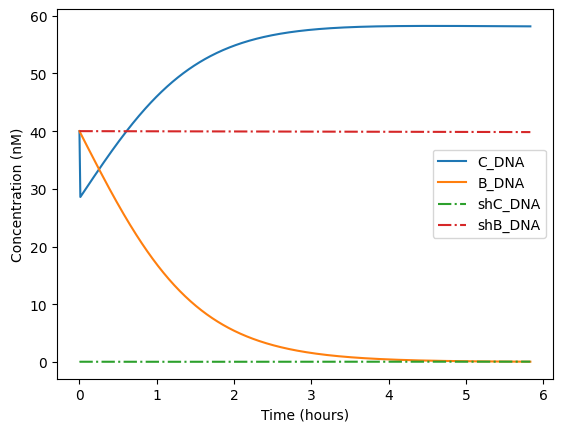

In [58]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/leaky_shadow/plots/leaky_shadow_scaleup', 
               x='time', 
                ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
#                    'shC': ['shCj', 'shCk'],
#                    'shB': ['shBr'],
#                    'O1': ['O1'],
#                    'O2': ['O2']
               },
               labels=['C_DNA', 'B_DNA', 'shC_DNA', 'shB_DNA', 'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashdot', 'dashdot', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# RPS

In [16]:
REG_FOLDER='rps_v2'

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


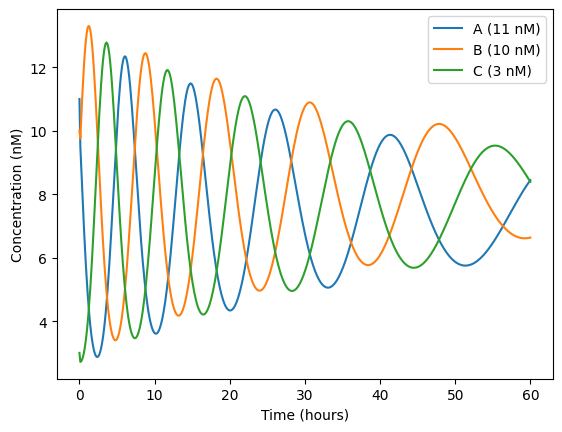

In [17]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


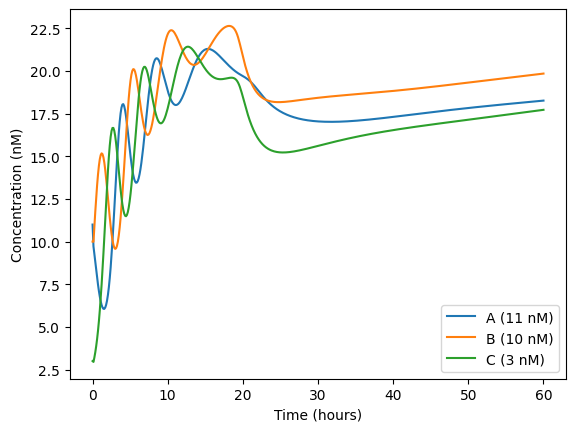

In [18]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


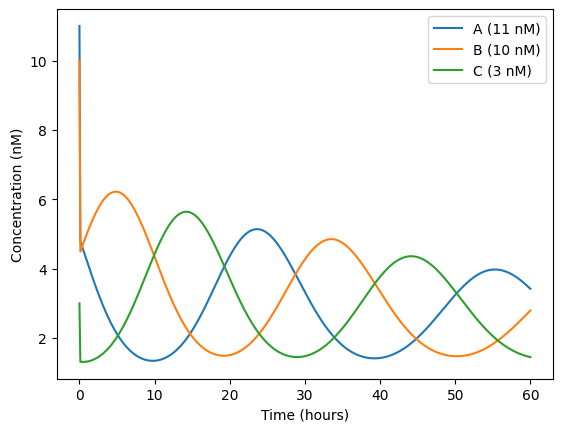

In [19]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/occluded/plots/occluded', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


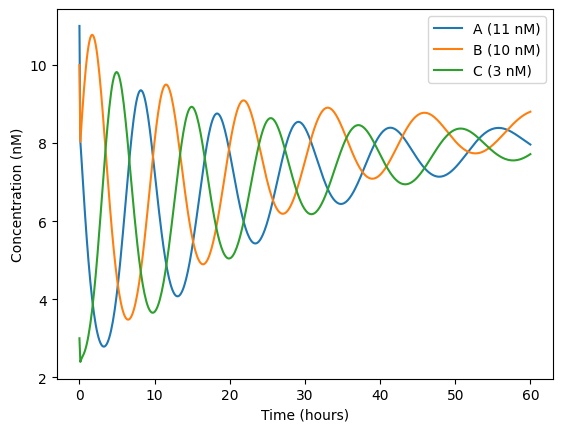

In [20]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

In [40]:
REG_FOLDER='rps_v2_nobuffer'

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


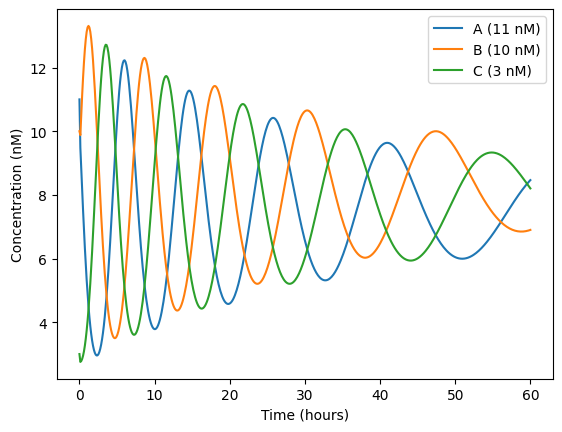

In [41]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


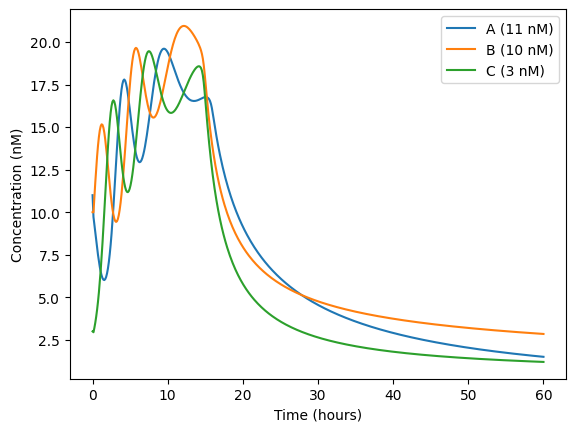

In [42]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


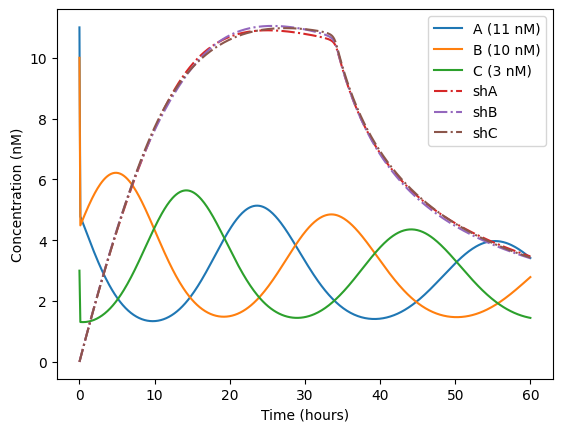

In [43]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/occluded/plots/occluded', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shC': ['shCj', 'shCk'],  
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)', 'shA', 'shB', 'shC'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashdot', 'dashdot', 'dashdot'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


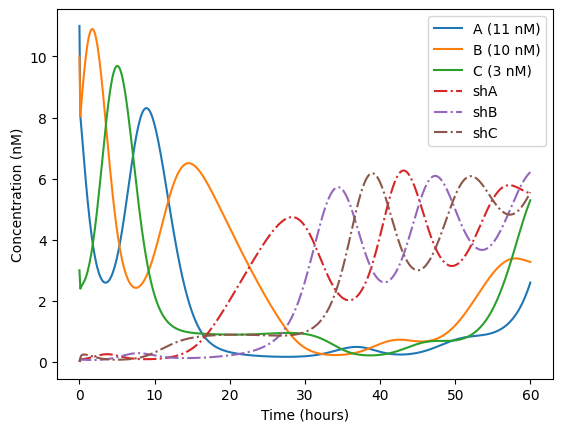

In [44]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shC': ['shCj', 'shCk'],  
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)', 'shA', 'shB', 'shC'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashdot', 'dashdot', 'dashdot'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# RPS Srinivas et al. 

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


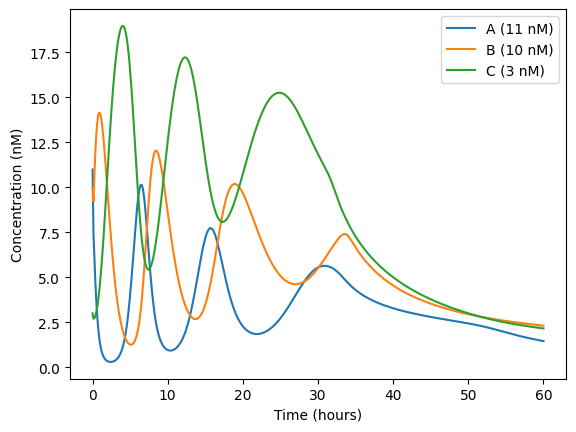

In [21]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_srini/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'HelperAAq', 'HelperBBs', 'HelperCCk']


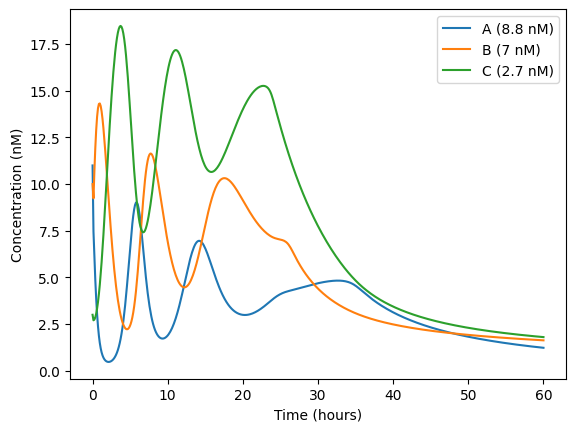

In [22]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_srini/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (8.8 nM)', 'B (7 nM)', 'C (2.7 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# RPS V2

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


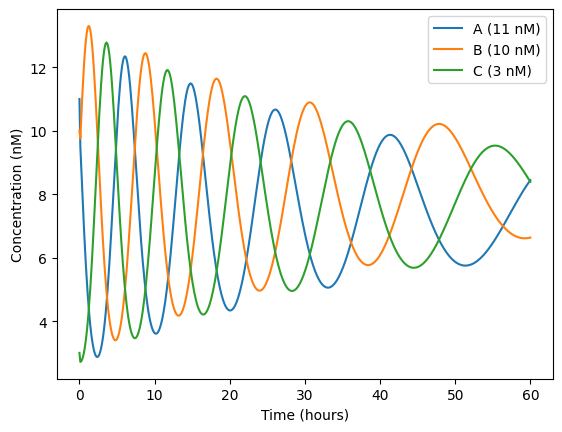

In [23]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


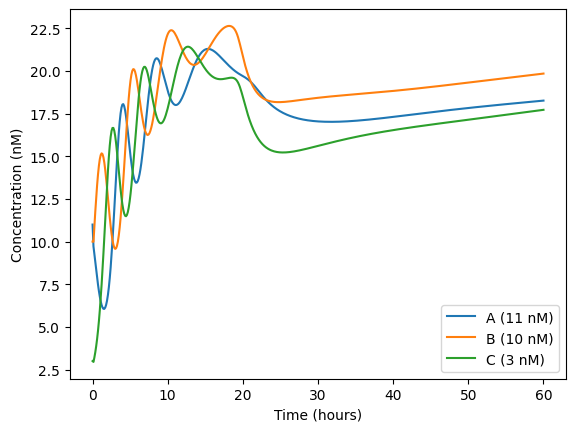

In [24]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


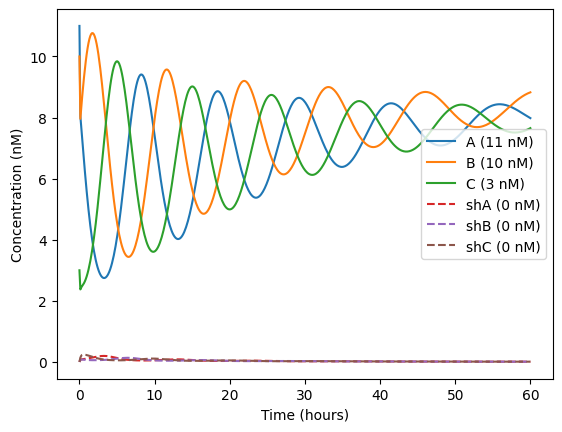

In [25]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)', 'shA (0 nM)', 'shB (0 nM)', 'shC (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

In [25]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow/plots/leaky_shadow_nobuffer', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

IndexError: list index out of range

## Toehold Occlusion

In [26]:
FOLDER='rps_v2'
SUBFOLDER = 'leaky_shadow_toeocc'

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow_toeocc/plots/leaky_shadow_toeocc_60_nM.png


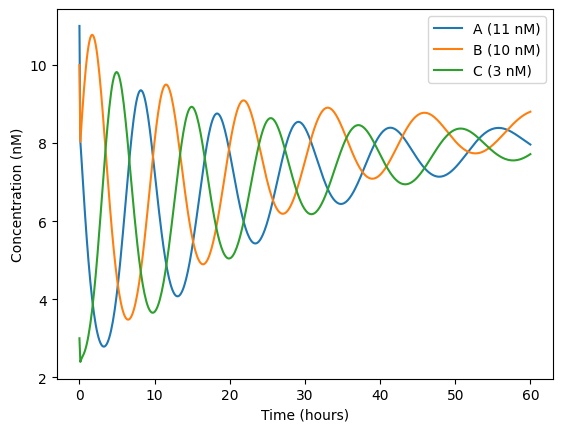

In [23]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/leaky_shadow_toeocc_60_nM', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='leaky_shadow_toeocc_60_nM',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow_toeocc/plots/leaky_shadow_toeocc_300_nM.png


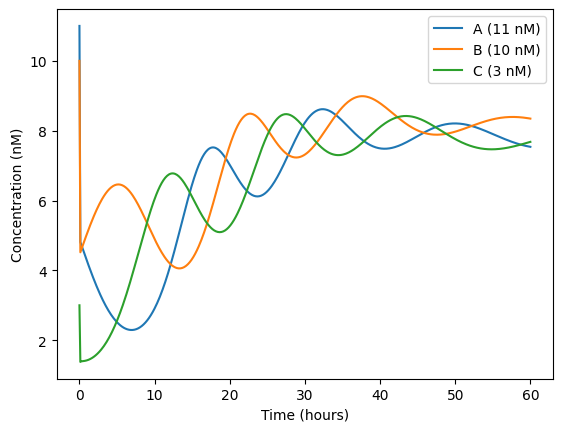

In [24]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/leaky_shadow_toeocc_300_nM', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='leaky_shadow_toeocc_300_nM',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow_toeocc/plots/leaky_shadow_toeocc_600_nM.png


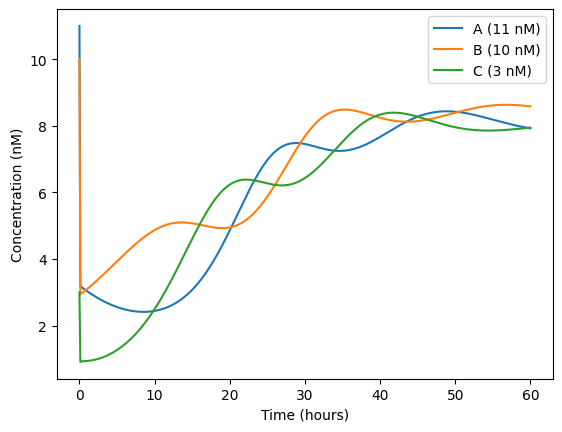

In [25]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/leaky_shadow_toeocc_600_nM', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='leaky_shadow_toeocc_600_nM',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow_toeocc/plots/leaky_shadow_toeocc_1000_nM.png


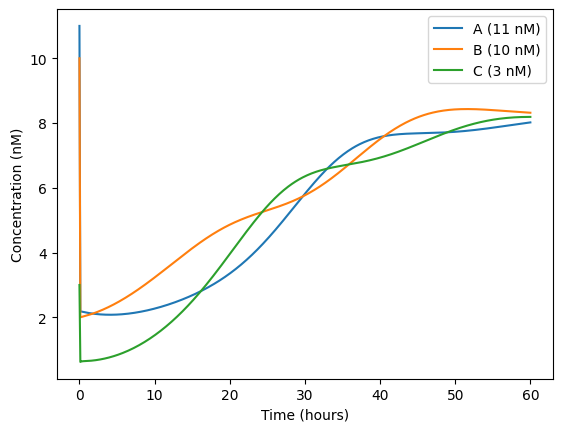

In [26]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/leaky_shadow_toeocc_1000_nM', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='leaky_shadow_toeocc_1000_nM',
               **kwargs)

# Consensus

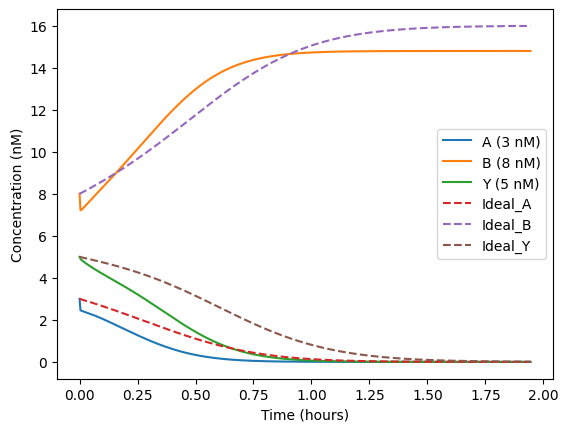

In [49]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/con_v2/original/plots/original', 
               x='time', 
               ys=['A', 'B', 'Y', 'OA', 'OB', 'OY'],
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)', 'Ideal_A', 'Ideal_B', 'Ideal_Y'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

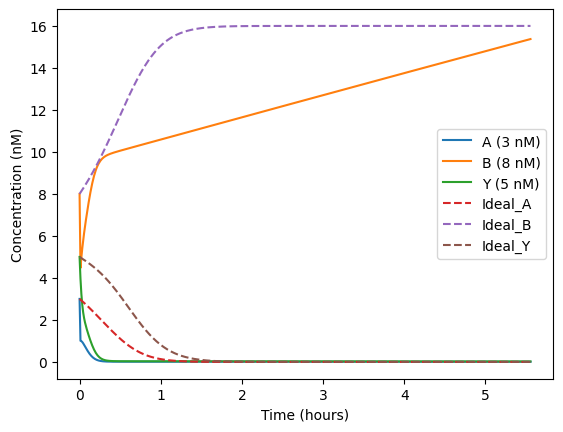

In [50]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/con_v2/leaky/plots/leaky', 
               x='time', 
               ys=['A', 'B', 'Y', 'OA', 'OB', 'OY'],
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)', 'Ideal_A', 'Ideal_B', 'Ideal_Y'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

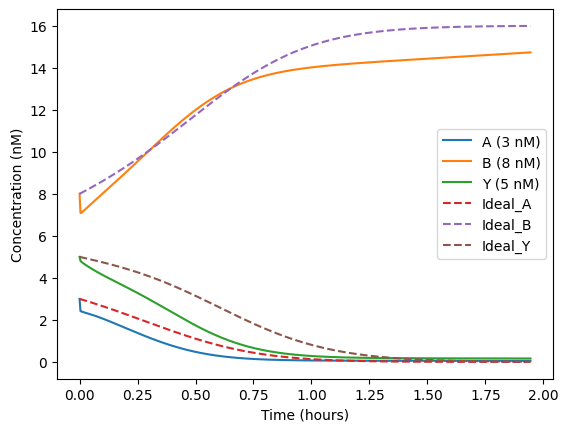

In [51]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/con_v2/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys=['A', 'B', 'Y', 'OA', 'OB', 'OY'],
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)', 'Ideal_A', 'Ideal_B', 'Ideal_Y'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

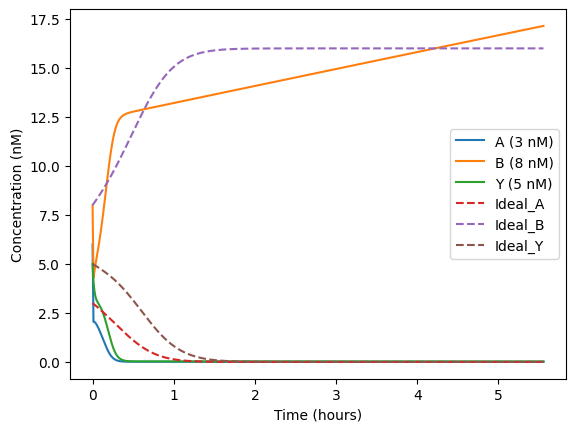

In [52]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/con_v2/leaky/plots/leaky_failure_case', 
               x='time', 
               ys=['A', 'B', 'Y', 'OA', 'OB', 'OY'],
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)', 'Ideal_A', 'Ideal_B', 'Ideal_Y'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

In [17]:
FOLDER='con_v3'

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'OA', 'OB', 'OY']


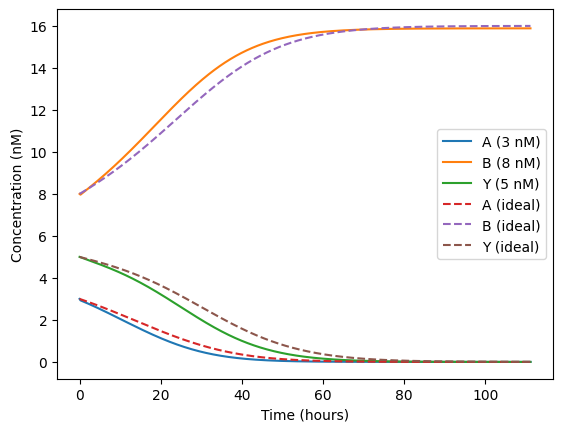

In [19]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
                   'OA': ['OA'],
                   'OB': ['OB'],
                   'OY': ['OY']
               },
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)', 'A (ideal)', 'B (ideal)', 'Y (ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'OA', 'OB', 'OY']


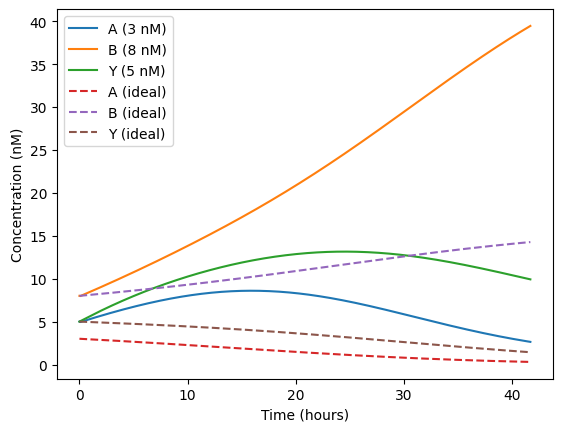

In [14]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
                   'OA': ['OA'],
                   'OB': ['OB'],
                   'OY': ['OY']
               },
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)', 'A (ideal)', 'B (ideal)', 'Y (ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'shAp', 'shAq', 'shBr', 'shBs', 'shYi', 'shYj', 'OA', 'OB', 'OY']


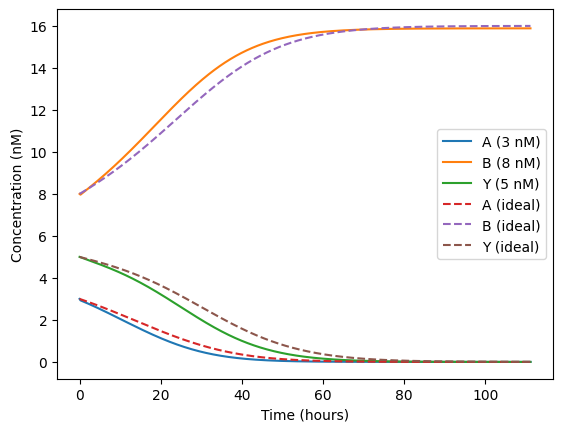

In [16]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/shadow/plots/shadow', 
               x='time', 
               ys={
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shY': ['shYi', 'shYj'],
                   'OA': ['OA'],
                   'OB': ['OB'],
                   'OY': ['OY']
               },
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)', 'A (ideal)', 'B (ideal)', 'Y (ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'shAp', 'shAq', 'shBr', 'shBs', 'shYi', 'shYj', 'OA', 'OB', 'OY']


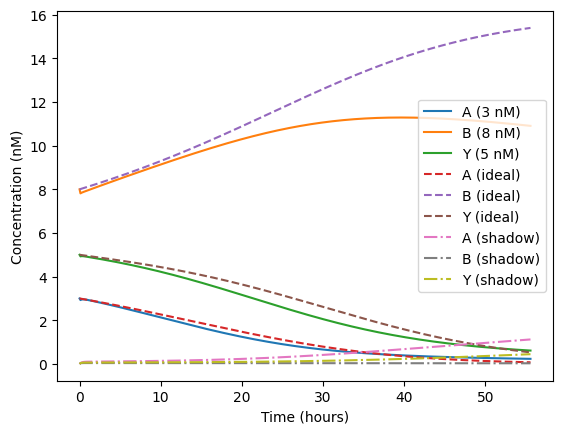

In [28]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
                   'OA': ['OA'],
                   'OB': ['OB'],
                   'OY': ['OY'],
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shY': ['shYi', 'shYj'],
               },
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)', 'A (ideal)', 'B (ideal)', 'Y (ideal)', 'A (shadow)', 'B (shadow)', 'Y (shadow)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed', 'dashdot', 'dashdot', 'dashdot'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'shAp', 'shAq', 'shBr', 'shBs', 'shYi', 'shYj', 'OA', 'OB', 'OY']


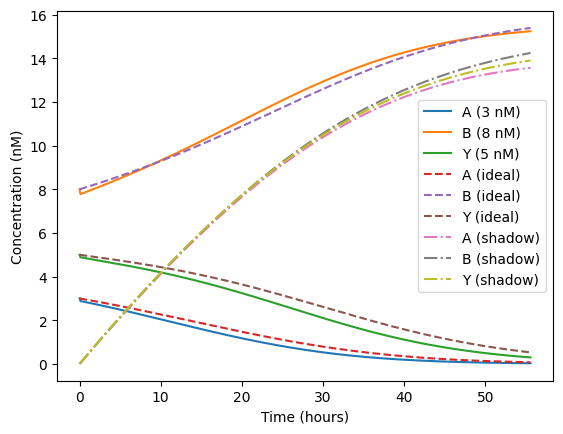

In [30]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/vanilla_occluded/plots/vanilla_occluded', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
                   'OA': ['OA'],
                   'OB': ['OB'],
                   'OY': ['OY'],
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shY': ['shYi', 'shYj'],
               },
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)', 'A (ideal)', 'B (ideal)', 'Y (ideal)', 'A (shadow)', 'B (shadow)', 'Y (shadow)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed', 'dashdot', 'dashdot', 'dashdot'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# Perturbation

In [8]:
FOLDER='rps_v2_pert'

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_0/plots/rps_original_shadow_pert-1X_cancel.png


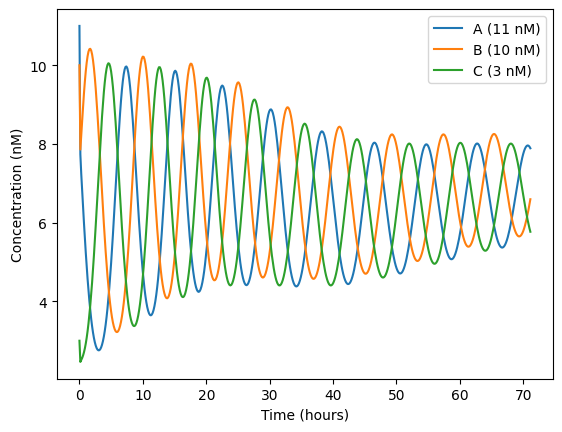

In [233]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_0/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-1X_cancel',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_5/plots/rps_original_shadow_pert-1.5X_cancel.png


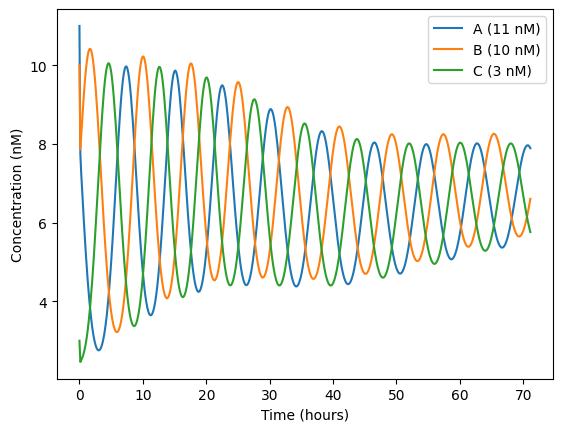

In [234]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_5/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-1.5X_cancel',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_original_shadow_pert-2X_cancel.png


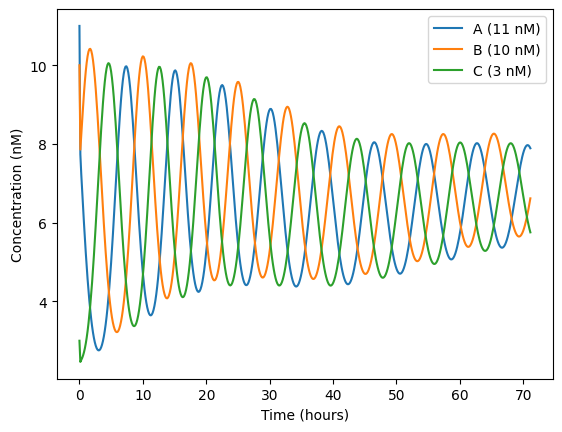

In [235]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/1/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-2X_cancel',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/4/plots/rps_original_shadow_pert-5X_cancel.png


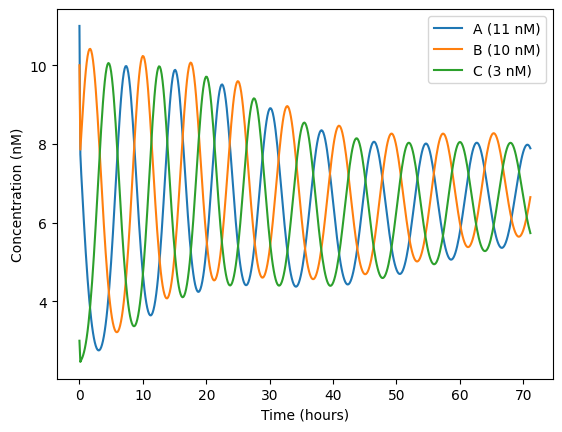

In [236]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/4/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-5X_cancel',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/9/plots/rps_original_shadow_pert-10X_cancel.png


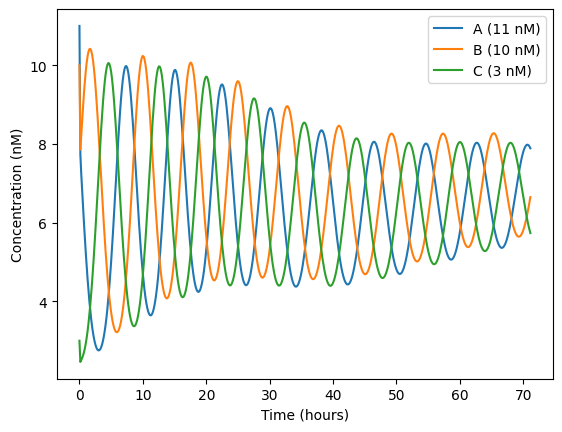

In [237]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/9/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-10X_cancel',
               **kwargs)

# Leaks under Perturbation and Shadow Cancellation

Here, we measure the leak in different cases of Perturbation with and without shadow cancellation. This shows that while in the absence of shadow cancellation the leak is amplified exponentially, in the presence of shadow cancellation, the leak is amplified subexponentially. This can be captured by the behavior of the shadow signal strands. 

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_0/plots/rps_orig_shadow_pert_nocancel_zeroconc.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_5/plots/rps_orig_shadow_pert_nocancel_zeroconc.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_nocancel_zeroconc.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/4/plots/rps_orig_shadow_pert_nocancel_zeroconc.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/toward

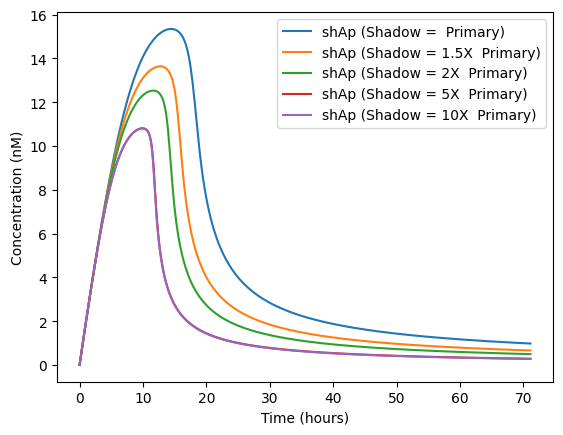

In [238]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['', '1.5X ', '2X ', '5X ', '10X ']
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel_zeroconc', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shAp (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='rps_orig_shadow_pert_nocancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_0/plots/rps_orig_shadow_pert_cancel_zeroconc.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_5/plots/rps_orig_shadow_pert_cancel_zeroconc.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_cancel_zeroconc.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/4/plots/rps_orig_shadow_pert_cancel_zeroconc.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyt

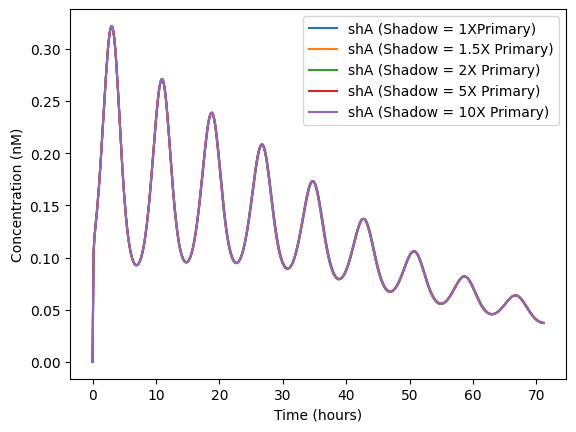

In [239]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = [ '1X', '1.5X ', '2X ', '5X ', '10X ']
dfs_cancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel_zeroconc', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'shA (Shadow = {labels[index]}Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name=f'rps_orig_shadow_pert_cancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_cancel.append(df)

## Plot combined

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_0/plots/rps_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_5/plots/rps_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/4/plots/rps_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Us

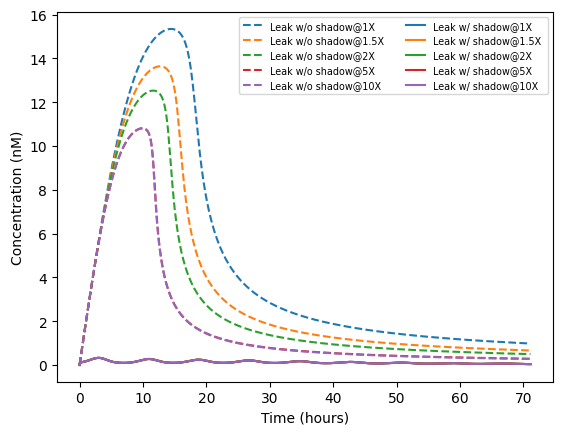

In [240]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['1X', '1.5X ', '2X ', '5X ', '10X ']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel_zeroconc', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'Leak w/o shadow@{labels[index]}'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed'],
                   colors=[tableau_colors[index]],
                   name='rps_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)
for index, pert in enumerate(perts):
    kwargs={}
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel_zeroconc', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'Leak w/ shadow@{labels[index]}'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name=f'rps_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

###  At a particular perturbation plot all the three species

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_nocancel_2X.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_cancel_2X.png


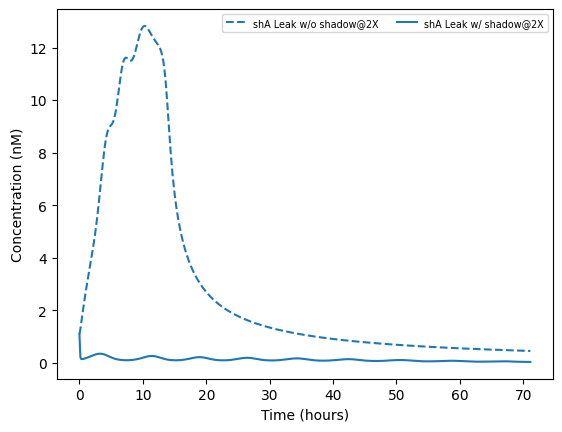

In [241]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['1']
labels = ['2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = {
        'shA': ['shAp', 'shAq']
     }

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/o shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'rps_orig_shadow_pert_nocancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'rps_orig_shadow_pert_cancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_cancel_2X_withprimary.png


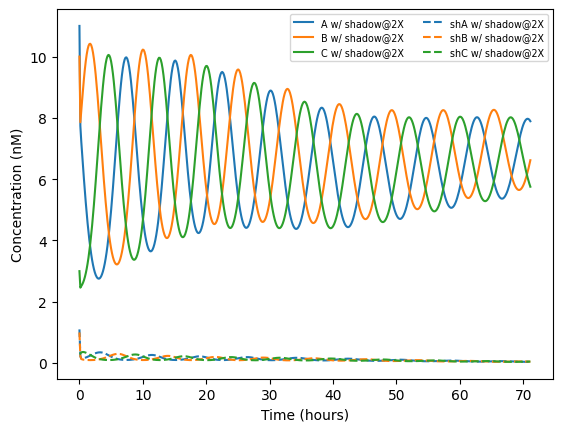

In [242]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['1']
labels = ['2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'

Ys = {
        'A': ['Ap', 'Aq'],
        'B': ['Br', 'Bs'],
        'C': ['Cj', 'Ck'],
        'shA': ['shAp', 'shAq'],
        'shB': ['shBr', 'shBs'],
        'shC': ['shCj', 'shCk']
     }
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'], 
                   colors=tableau_colors[index:index+len(Ys)//2]*2,
                   name=f'rps_orig_shadow_pert_cancel_{labels[index]}_withprimary',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

## BIAMP Perturbation Experimentsy

In [ ]:
FOLDER = 'biamp'

['time', 'Cj', 'Ck', 'Br', 'O1', 'O2']


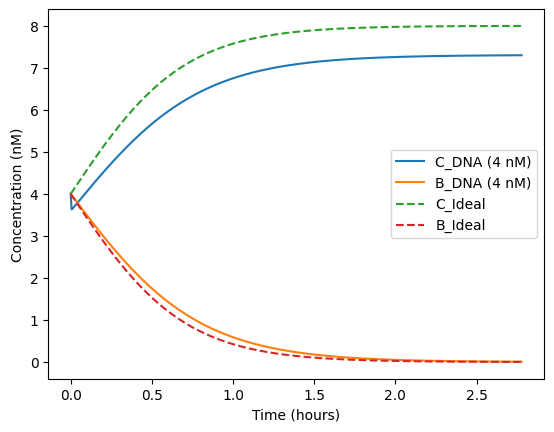

In [32]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/main_max', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-1.5X_cancel',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


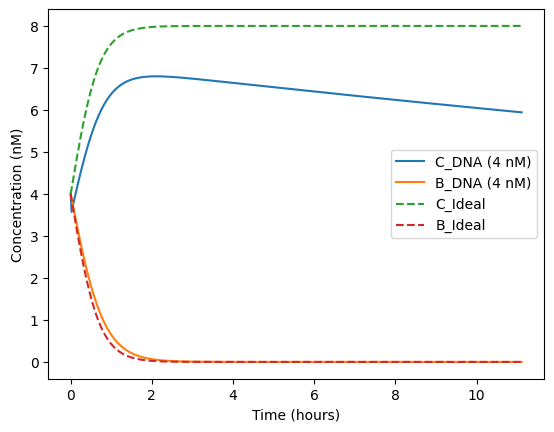

In [36]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_0/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-1.5X_cancel',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


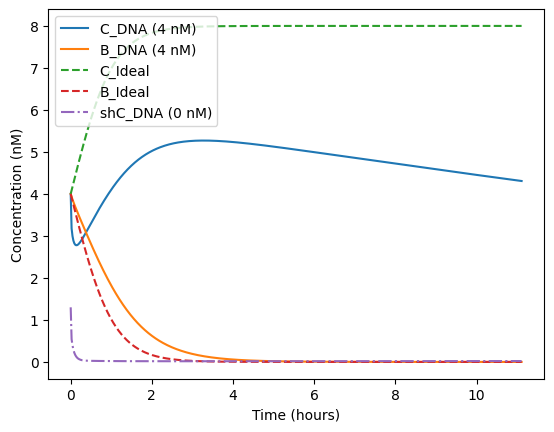

In [37]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_5/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2'], 
                   'shC': ['shCj', 'shCk']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal', 'shC_DNA (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed', 'dashdot'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-1.5X_cancel',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


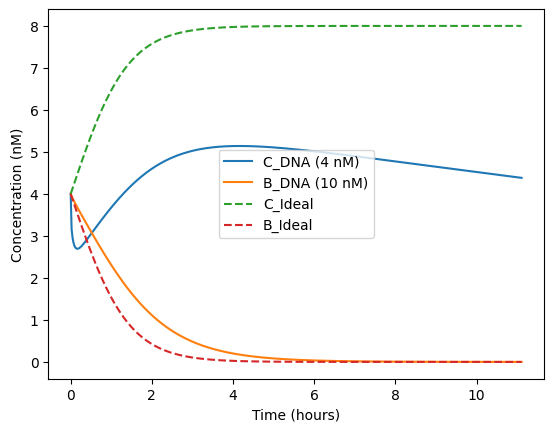

In [39]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/1/plots/orig_shadow_pert_cancel', 
                x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (10 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-2X_cancel',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


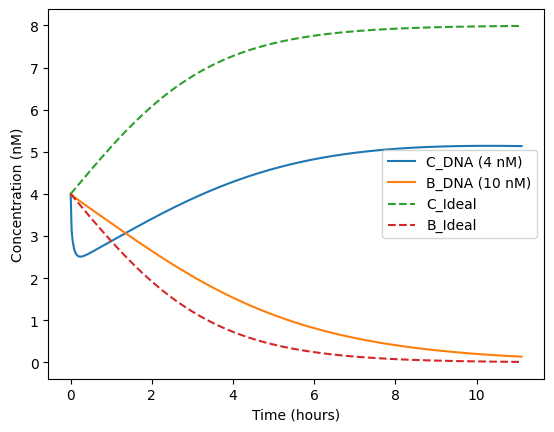

In [40]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/4/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (10 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-5X_cancel',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


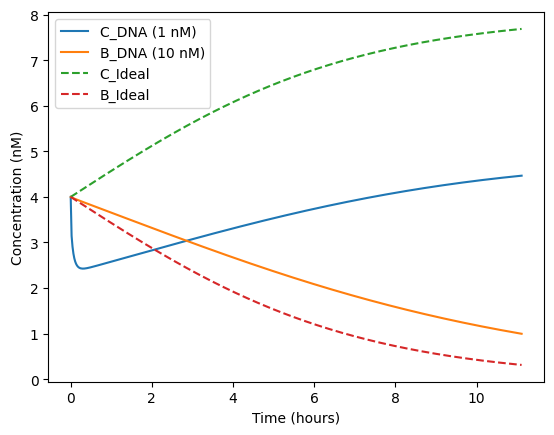

In [41]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/9/plots/orig_shadow_pert_cancel', 
                x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (10 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-10X_cancel',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


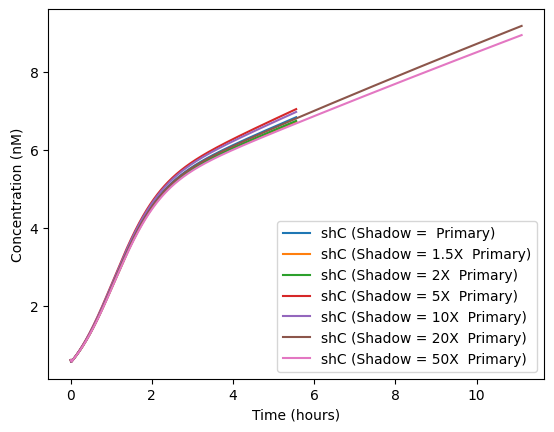

In [92]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9', '19', '49']
labels = ['', '1.5X ', '2X ', '5X ', '10X ', '20X ', '50X ']
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_pert_nocancel',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


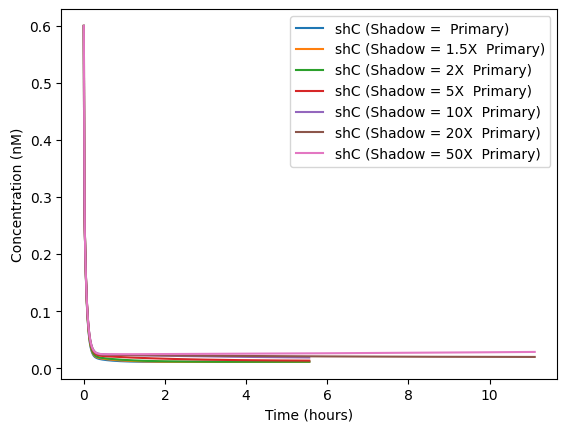

In [93]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9', '19', '49']
labels = ['', '1.5X ', '2X ', '5X ', '10X ', '20X ', '50X ']
dfs_cancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name=f'biamp_orig_shadow_pert_cancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_cancel.append(df)

## Plot combined

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


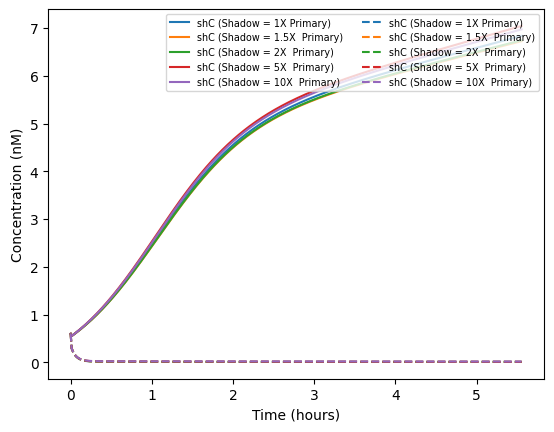

In [86]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['1X', '1.5X ', '2X ', '5X ', '10X ']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)
for index, pert in enumerate(perts):
    kwargs={}
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed'],
                   colors=[tableau_colors[index]],
                   name=f'biamp_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

###  At a particular perturbation plot all the three species

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


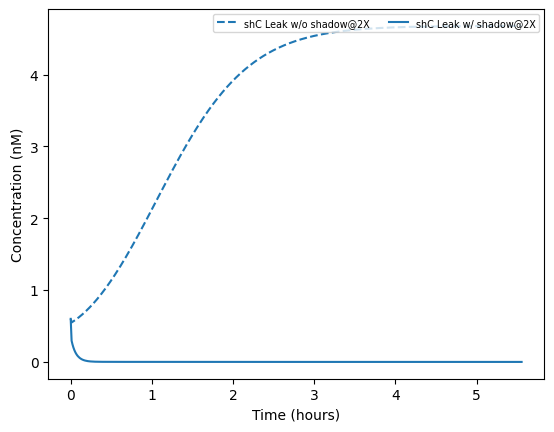

In [87]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['1']
labels = ['2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = {
        'shC': ['shCj', 'shCj']
     }

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/o shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'biamp_orig_shadow_pert_nocancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'biamp_orig_shadow_pert_cancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

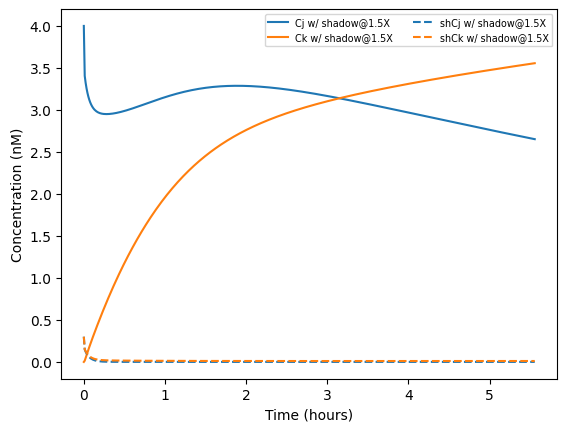

In [88]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_5']
labels = ['1.5X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = [ 'Cj', 'Ck', 'shCj', 'shCk']
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys[:2]] + ['dashed' for y in Ys[2:]], 
                   colors=tableau_colors[index:index+len(Ys)//2]*2,
                   name=f'biamp_orig_shadow_pert_cancel_{labels[index]}_withprimary',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

### BIAMP COMPRESSED

In [172]:
FOLDER = 'biamp_compress'

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_0/plots/biamp_original_shadow_pert-1X_cancel.png


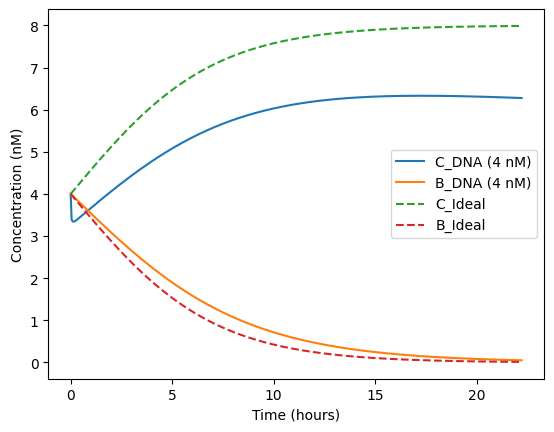

In [173]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_0/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-1X_cancel',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_5/plots/biamp_original_shadow_pert-1.5X_cancel.png


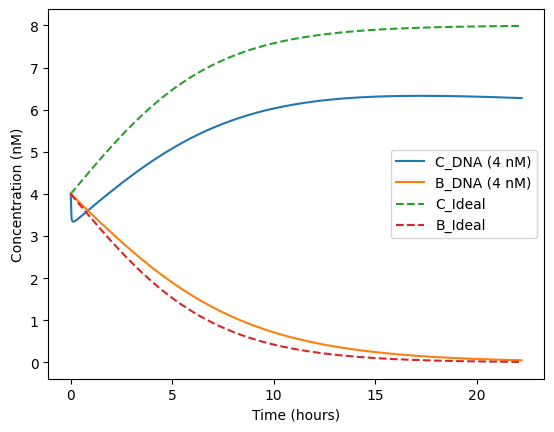

In [174]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_5/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-1.5X_cancel',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/1/plots/biamp_original_shadow_pert-2X_cancel.png


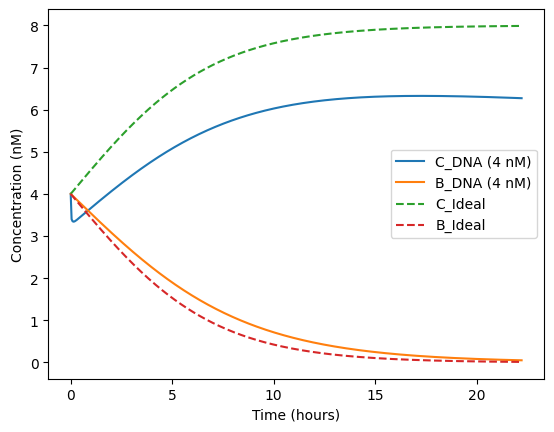

In [175]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/1/plots/orig_shadow_pert_cancel', 
                x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-2X_cancel',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/4/plots/biamp_original_shadow_pert-5X_cancel.png


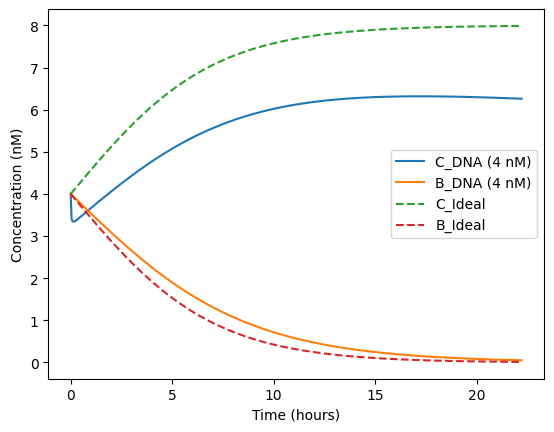

In [176]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/4/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-5X_cancel',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/9/plots/biamp_original_shadow_pert-10X_cancel.png


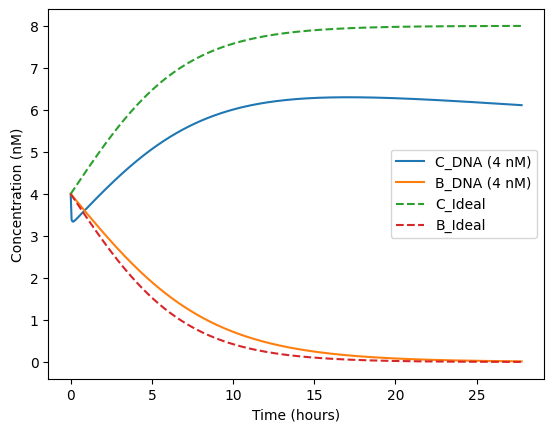

In [177]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/9/plots/orig_shadow_pert_cancel', 
                x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-10X_cancel',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_0/plots/biamp_orig_shadow_pert_nocancel.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_5/plots/biamp_orig_shadow_pert_nocancel.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/1/plots/biamp_orig_shadow_pert_nocancel.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/4/plots/biamp_orig_shadow_pert_nocancel.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/9/plots/biamp_orig_shadow_pert_nocancel.png


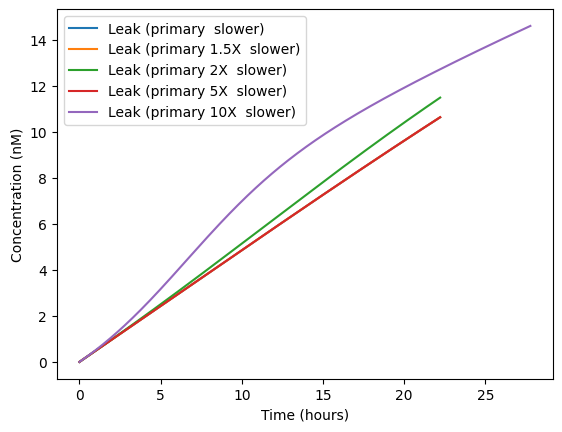

In [185]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['', '1.5X ', '2X ', '5X ', '10X ']
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj'] # Note that even signal are set to zero in zeroconc.
                   },
                   labels=[f'Leak (primary {labels[index]} slower)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_pert_nocancel',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_0/plots/biamp_orig_shadow_pert_cancel.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_5/plots/biamp_orig_shadow_pert_cancel.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/1/plots/biamp_orig_shadow_pert_cancel.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/4/plots/biamp_orig_shadow_pert_cancel.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/9/plots/biamp_orig_shadow_pert_cancel.png


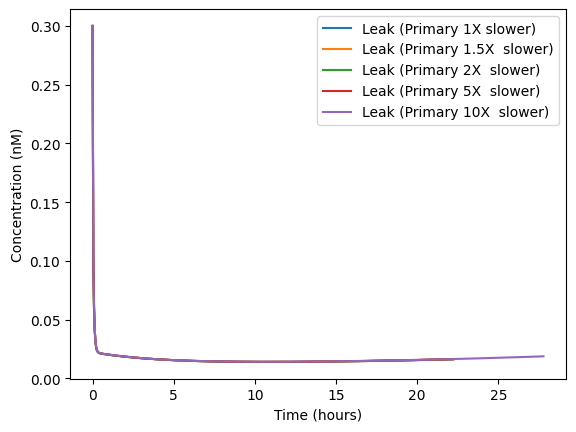

In [186]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = [ '1X', '1.5X ', '2X ', '5X ', '10X ']
dfs_cancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'Leak (Primary {labels[index]} slower)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name=f'biamp_orig_shadow_pert_cancel',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_cancel.append(df)

## Plot combined

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_0/plots/biamp_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_5/plots/biamp_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/1/plots/biamp_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/4/plots/biamp_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/9/plots/biamp_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desk

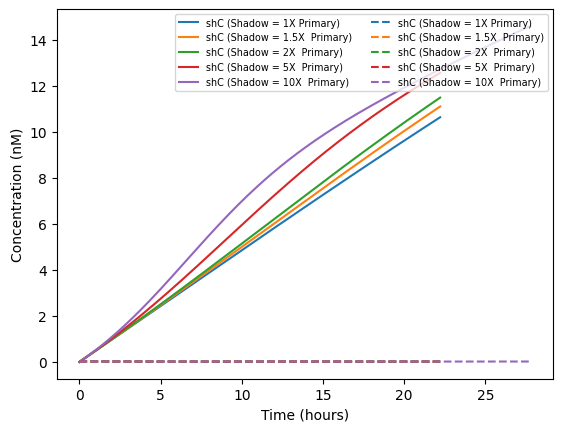

In [187]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['1X', '1.5X ', '2X ', '5X ', '10X ']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel_zeroconc', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)
for index, pert in enumerate(perts):
    kwargs={}
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel_zeroconc', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed'],
                   colors=[tableau_colors[index]],
                   name=f'biamp_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

###  At a particular perturbation plot all the three species

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/1/plots/biamp_orig_shadow_pert_nocancel_2X.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/1/plots/biamp_orig_shadow_pert_cancel_2X.png


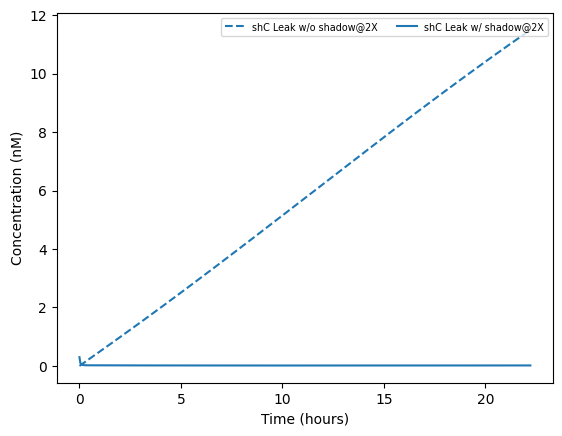

In [188]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['1']
labels = ['2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = {
        'shC': ['shCj']
     }

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/o shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'biamp_orig_shadow_pert_nocancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'biamp_orig_shadow_pert_cancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_5/plots/biamp_orig_shadow_pert_cancel_1.5X_withprimary.png


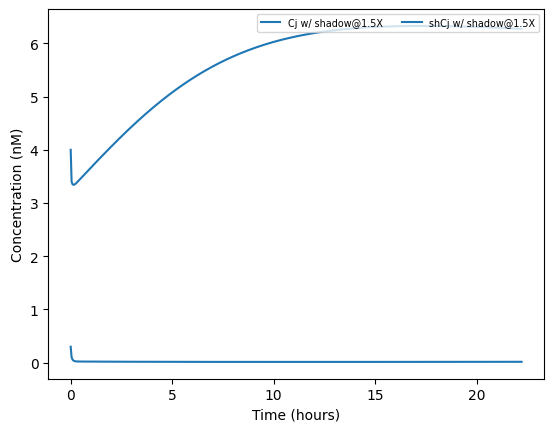

In [183]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_5']
labels = ['1.5X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = [ 'Cj', 'shCj']
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys[:2]] + ['dashed' for y in Ys[2:]], 
                   colors=tableau_colors[index:index+len(Ys)//2]*2,
                   name=f'biamp_orig_shadow_pert_cancel_{labels[index]}_withprimary',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr']


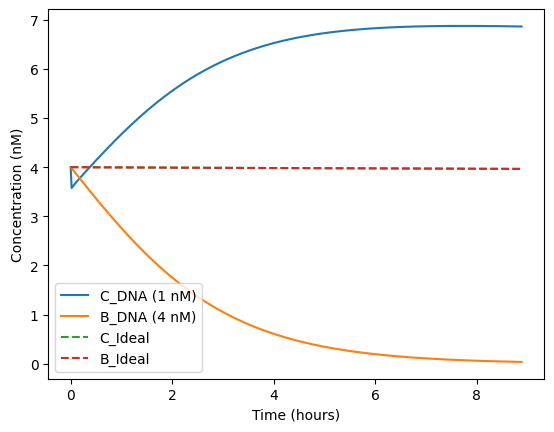

In [393]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/0_0/plots/orig_1x', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='orig_1x',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr']


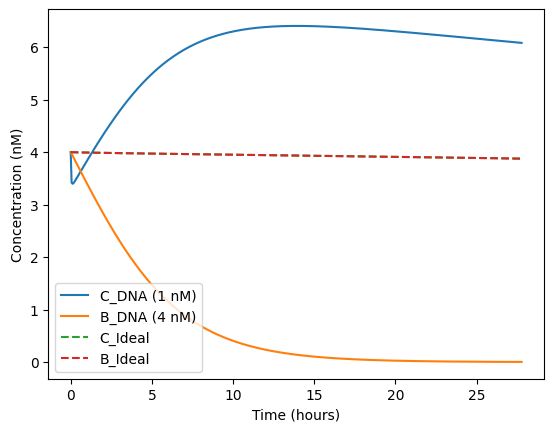

In [392]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/0_0/plots/orig_2x_slower', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='orig_2x_slower',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr']


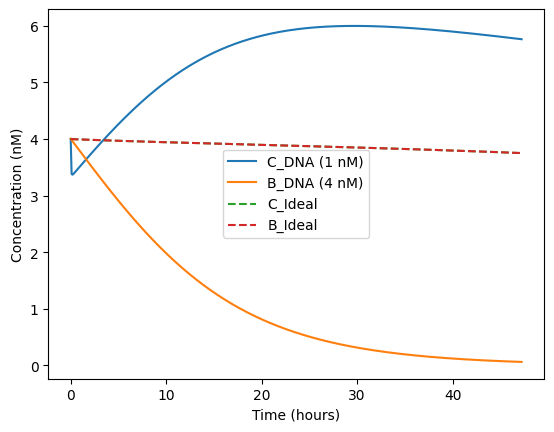

In [396]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/0_0/plots/orig_5x_slower', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='orig_5x_slower',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr']


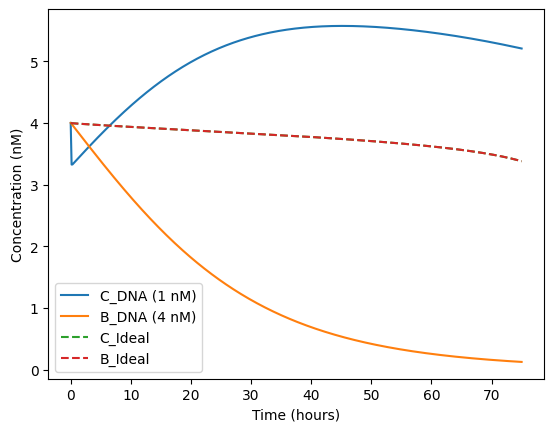

In [395]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/0_0/plots/orig_10x_slower', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='orig_10x_slower',
               **kwargs)

# Catalysis, Annihilation, and Degradation

ValueError: 'O1' is neither a data key nor a valid format string (unrecognized character 'O')

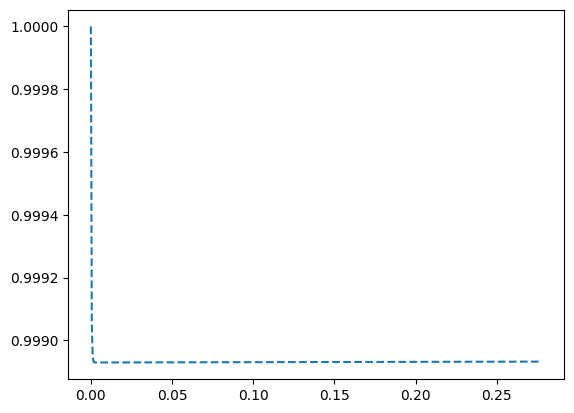

In [389]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r1_cat', 
               x='time', 
               ys=['X1', 'O1', 'X2', 'O2'],
               labels=['X_DNA (1 nM)', 'X_Ideal (1 nM)', 'Y_DNA (0 nM)', 'Y_Ideal (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashed', 'dashed', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

In [ ]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r4_deg', 
               x='time', 
               ys=['X1', 'O1'],
               labels=['Y_Ideal (1 nM)', 'Y_DNA (1 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashed', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

In [ ]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r11_ann', 
               x='time', 
               ys=['X1', 'X2', 'O1', 'O2'],
               labels=['Xp_DNA', 'Xm_DNA', 'Xp_Ideal', 'Xm_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# Control

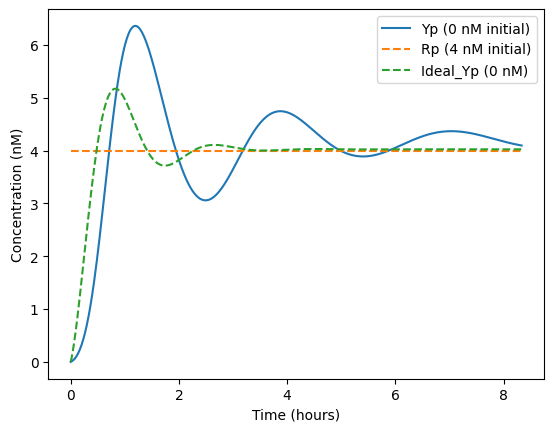

In [30]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal', 
               x='time', 
               ys=['Yp', 'Ideal_Rp', 'Ideal_Yp'],
               labels=['Yp (0 nM initial)', 'Rp (4 nM initial)', 'Ideal_Yp (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

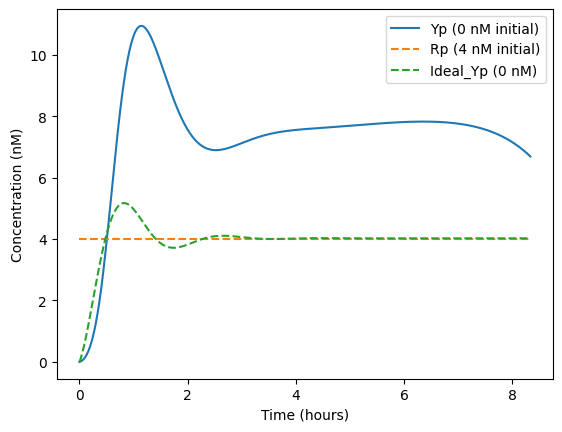

In [31]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal_leaky', 
               x='time', 
               ys=['Yp', 'Ideal_Rp', 'Ideal_Yp'],
               labels=['Yp (0 nM initial)', 'Rp (4 nM initial)', 'Ideal_Yp (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

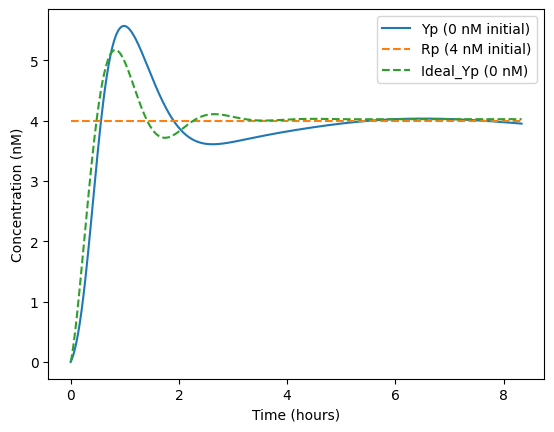

In [32]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal_leaky_shadow', 
               x='time', 
               ys=['Yp', 'Ideal_Rp', 'Ideal_Yp'],
               labels=['Yp (0 nM initial)', 'Rp (4 nM initial)', 'Ideal_Yp (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

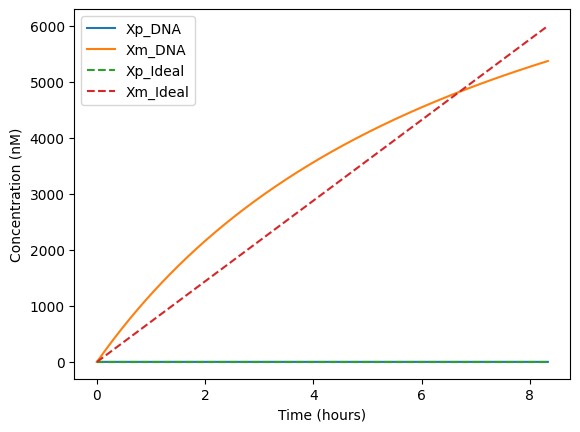

In [40]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r8_prod', 
               x='time', 
               ys=['X1', 'X2', 'O1', 'O2'],
               labels=['Xp_DNA', 'Xm_DNA', 'Xp_Ideal', 'Xm_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

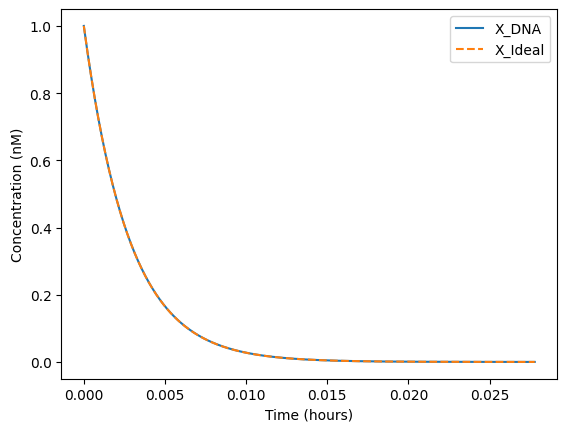

In [41]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r9_cons', 
               x='time', 
               ys=['X1', 'O1'],
               labels=['X_DNA', 'X_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

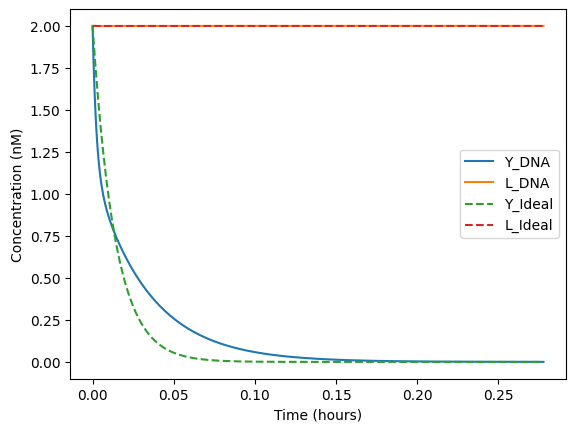

In [42]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r10_load', 
               x='time', 
               ys=['X1', 'X2', 'O1', 'O2'],
               labels=['Y_DNA', 'L_DNA', 'Y_Ideal', 'L_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# Leak Perturbation

In [292]:
FOLDER='rps_v2_pert'
SUBFOLDER='pert_leak'

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/0/plots/rps_original_shadow_cancel_pert_leak-0.png


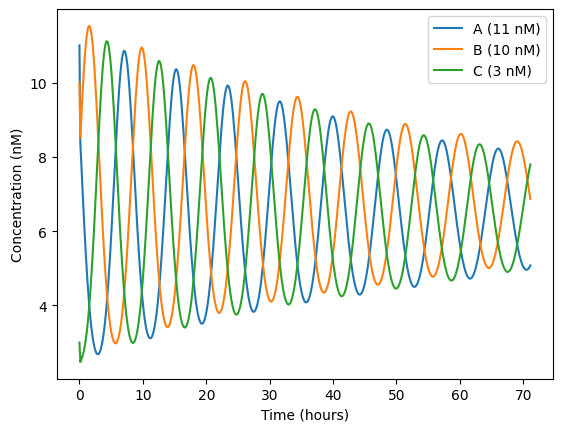

In [293]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/0/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_cancel_pert_leak-0',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/1/plots/rps_original_shadow_cancel_pert_leak-1.png


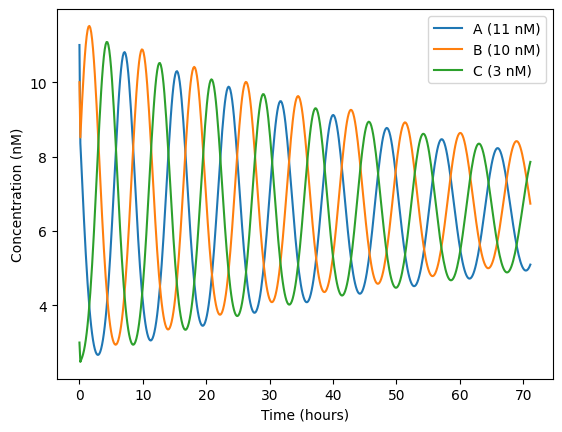

In [294]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/1/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_cancel_pert_leak-1',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/5/plots/rps_original_shadow_cancel_pert_leak-5.png


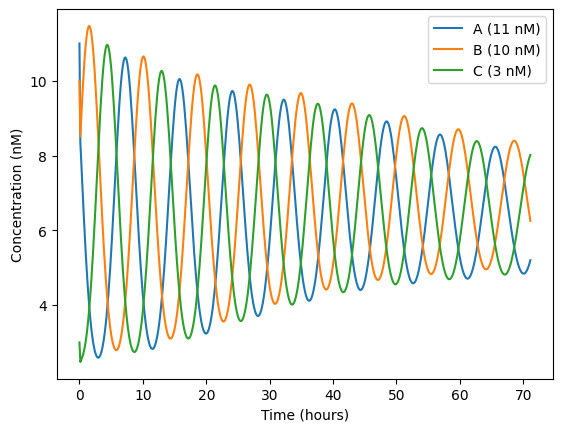

In [295]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/5/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_cancel_pert_leak-5',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/10/plots/rps_original_shadow_cancel_pert_leak-10.png


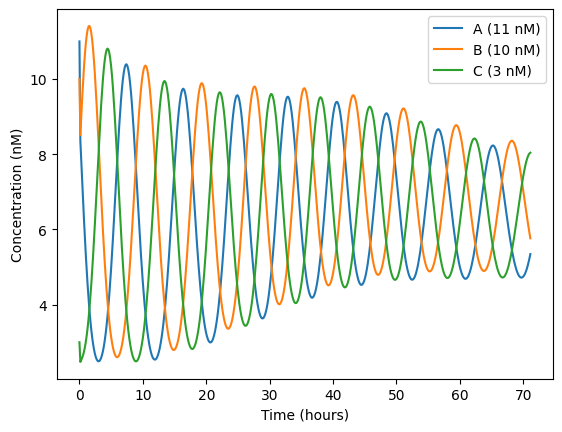

In [296]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/10/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_cancel_pert_leak-10',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/20/plots/rps_original_shadow_cancel_pert_leak-20.png


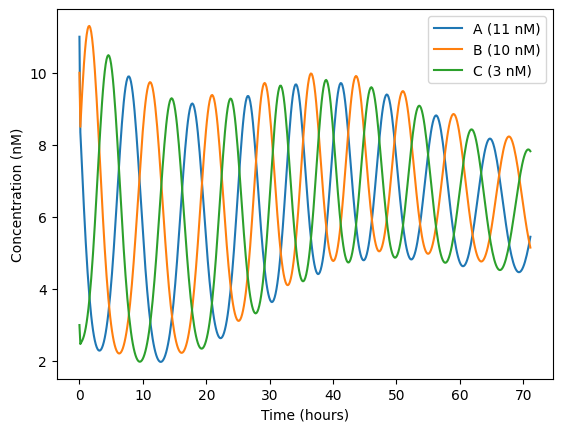

In [297]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/20/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_cancel_pert_leak-20',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/50/plots/rps_original_shadow_cancel_pert_leak-50.png


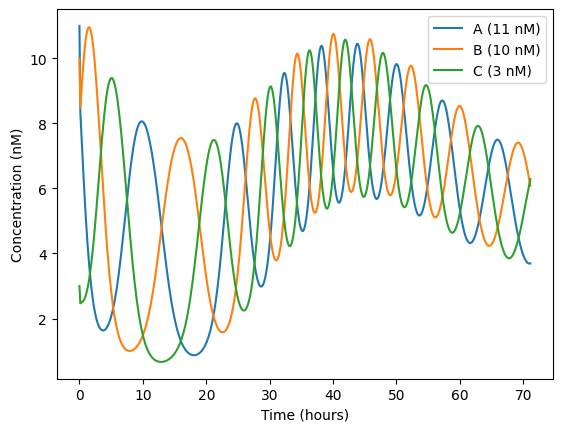

In [298]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/50/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_cancel_pert_leak-50',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/100/plots/rps_original_shadow_cancel_pert_leak-100.png


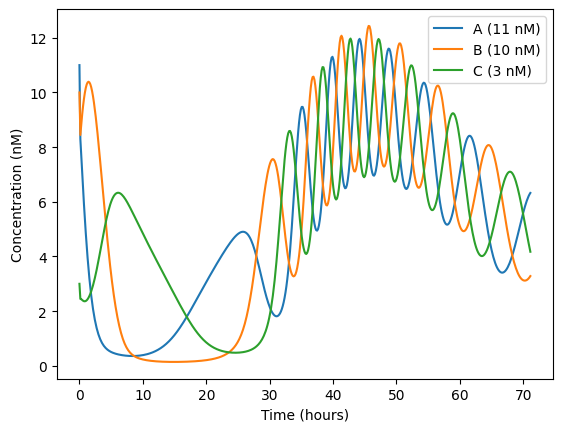

In [299]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/100/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_cancel_pert_leak-100',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/0/plots/rps_orig_shadow_nocancel.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/1/plots/rps_orig_shadow_nocancel.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/5/plots/rps_orig_shadow_nocancel.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/10/plots/rps_orig_shadow_nocancel.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/p

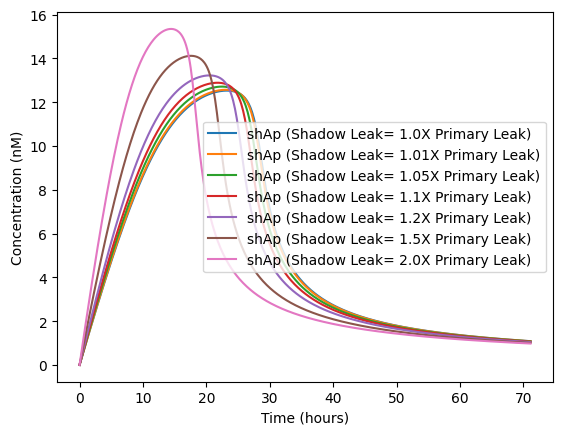

In [300]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0', '1', '5', '10', '20', '50', '100']
labels = [f'{1 + int(pert)/100}X' for pert in perts]
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_nocancel', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'shAp (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='rps_orig_shadow_nocancel',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/0/plots/rps_orig_shadow_cancel.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/1/plots/rps_orig_shadow_cancel.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/5/plots/rps_orig_shadow_cancel.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/10/plots/rps_orig_shadow_cancel.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak

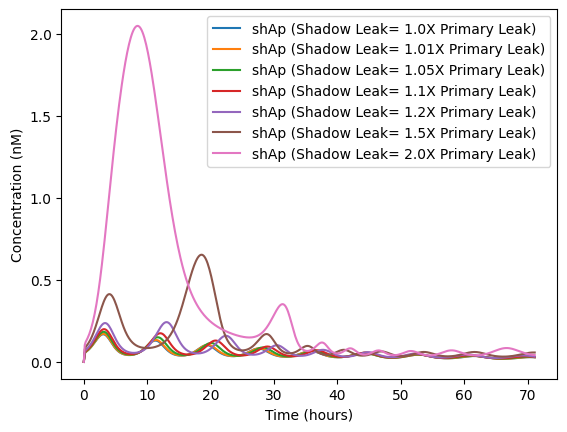

In [301]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0', '1', '5', '10', '20', '50', '100']
labels = [f'{1 + int(pert)/100}X' for pert in perts]
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'shAp (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='rps_orig_shadow_cancel',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

###  At a particular perturbation plot all the three species

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/50/plots/rps_orig_shadow_pert_nocancel_1.5X.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/50/plots/rps_orig_shadow_pert_cancel_{labels[index]}.png


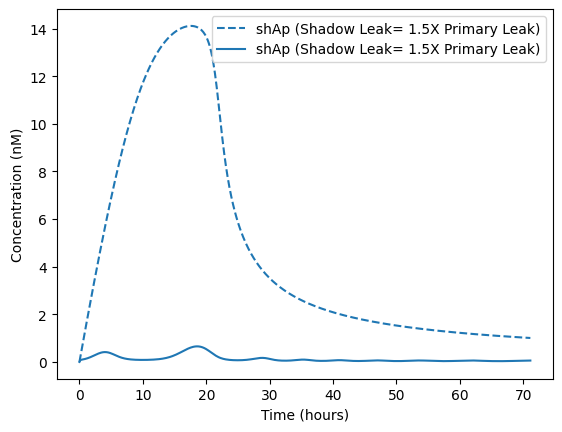

In [303]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['50']
labels = ['1.5X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = {
        'shA': ['shAp', 'shAq']
     }

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_nocancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'shAp (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'rps_orig_shadow_pert_nocancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'shAp (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='rps_orig_shadow_pert_cancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/1/plots/rps_orig_shadow_cancel_2X_withprimary.png


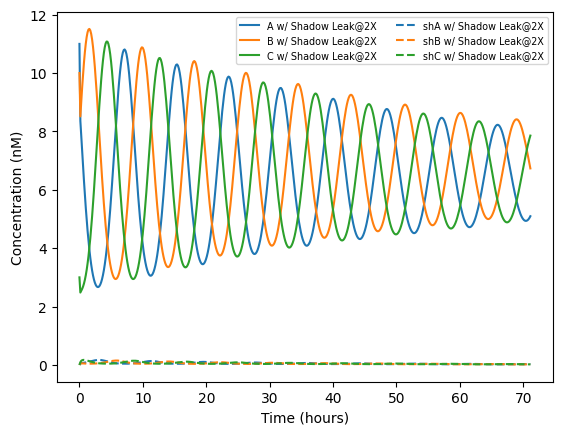

In [304]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['1']
labels = ['2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'

Ys = {
        'A': ['Ap', 'Aq'],
        'B': ['Br', 'Bs'],
        'C': ['Cj', 'Ck'],
        'shA': ['shAp', 'shAq'],
        'shB': ['shBr', 'shBs'],
        'shC': ['shCj', 'shCk']
     }
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} w/ Shadow Leak@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'], 
                   colors=tableau_colors[index:index+len(Ys)//2]*2,
                   name=f'rps_orig_shadow_cancel_{labels[index]}_withprimary',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

In [305]:
FOLDER='biamp_pert'
SUBFOLDER='pert_leak'

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/0/plots/biamp_original_shadow_cancel_leak-0.png


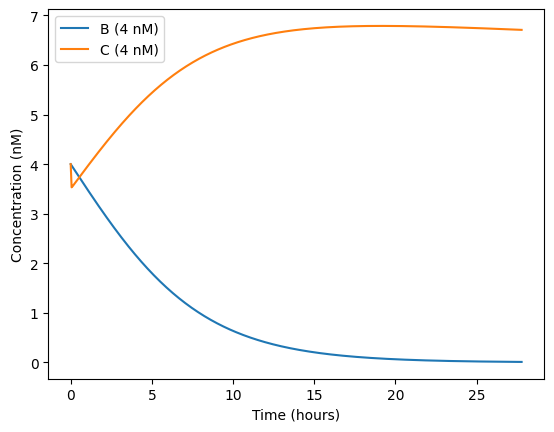

In [311]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/0/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'B': ['Br'],
                   'C': ['Cj'],
               },
               labels=['B (4 nM)', 'C (4 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_cancel_leak-0',
               **kwargs)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/1/plots/biamp_original_shadow_cancel_leak-1.png


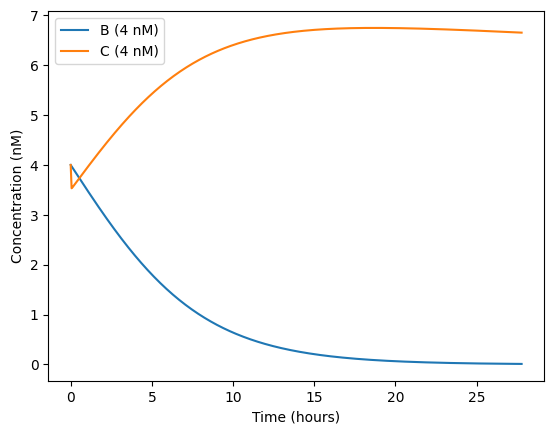

In [330]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/1/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'B': ['Br'],
                   'C': ['Cj'],
               },
               labels=['B (4 nM)', 'C (4 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_cancel_leak-1',
               **kwargs)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/5/plots/biamp_original_shadow_cancel_leak-5.png


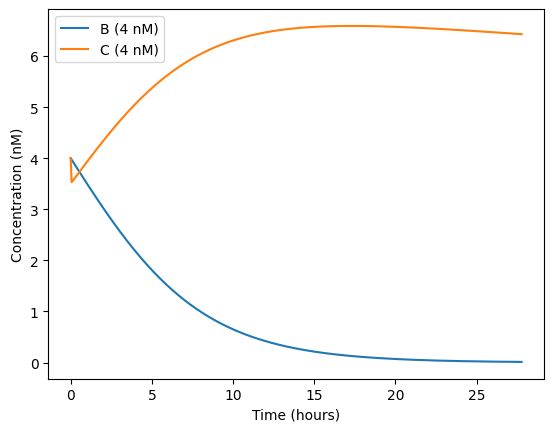

In [332]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/5/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'B': ['Br'],
                   'C': ['Cj'],
               },
               labels=['B (4 nM)', 'C (4 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_cancel_leak-5',
               **kwargs)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/10/plots/biamp_original_shadow_cancel_leak-10.png


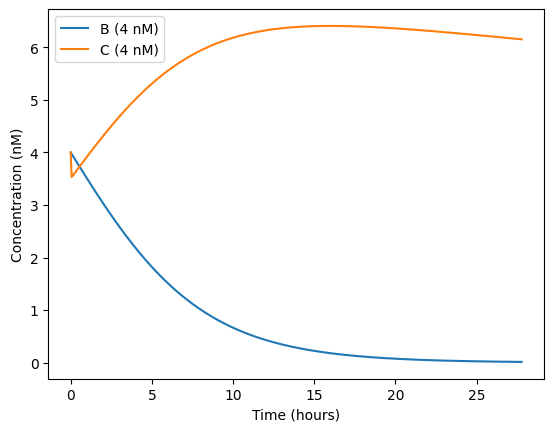

In [333]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/10/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'B': ['Br'],
                   'C': ['Cj'],
               },
               labels=['B (4 nM)', 'C (4 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_cancel_leak-10',
               **kwargs)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/20/plots/biamp_original_shadow_cancel_leak-20.png


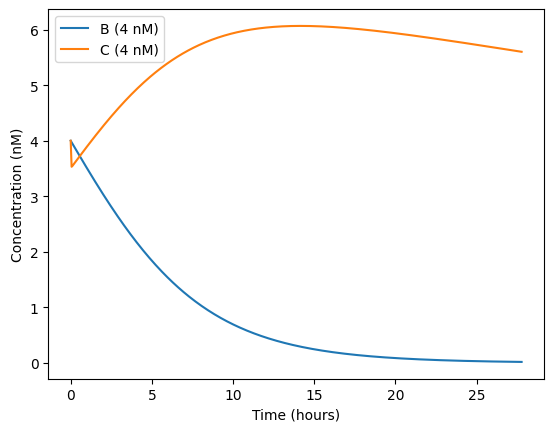

In [334]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/20/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'B': ['Br'],
                   'C': ['Cj'],
               },
               labels=['B (4 nM)', 'C (4 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_cancel_leak-20',
               **kwargs)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/50/plots/biamp_original_shadow_cancel_leak-50.png


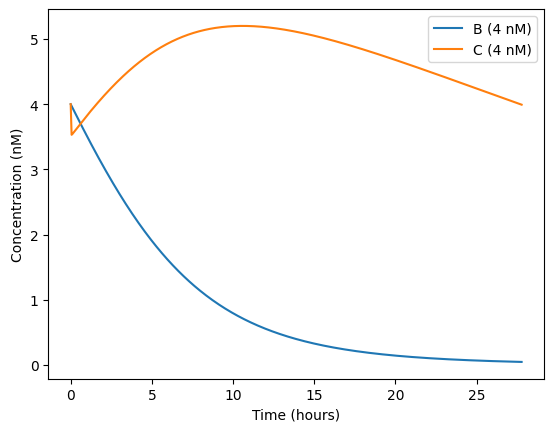

In [335]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/50/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'B': ['Br'],
                   'C': ['Cj'],
               },
               labels=['B (4 nM)', 'C (4 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_cancel_leak-50',
               **kwargs)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/100/plots/biamp_original_shadow_cancel_leak-100.png


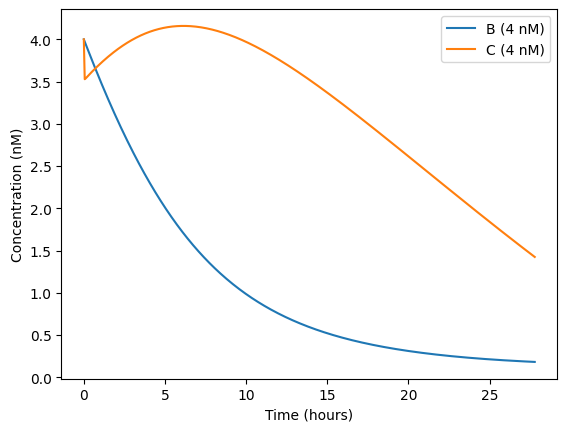

In [336]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/100/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'B': ['Br'],
                   'C': ['Cj'],
               },
               labels=['B (4 nM)', 'C (4 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_cancel_leak-100',
               **kwargs)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/0/plots/biamp_orig_shadow_nocancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/1/plots/biamp_orig_shadow_nocancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/5/plots/biamp_orig_shadow_nocancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/10/plots/biamp_orig_shadow_nocancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/20/plots/biamp_orig_shadow_nocancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/50/plots/biamp_orig_shadow_nocancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users

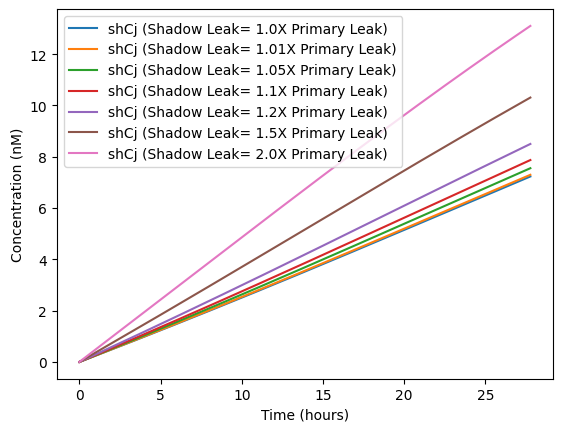

In [337]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0', '1', '5', '10', '20', '50', '100']
labels = [f'{1 + int(pert)/100}X' for pert in perts]
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_nocancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'shCj (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_nocancel_leak',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/0/plots/rps_orig_shadow_cancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/1/plots/rps_orig_shadow_cancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/5/plots/rps_orig_shadow_cancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/10/plots/rps_orig_shadow_cancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/20/plots/rps_orig_shadow_cancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/50/plots/rps_orig_shadow_cancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towar

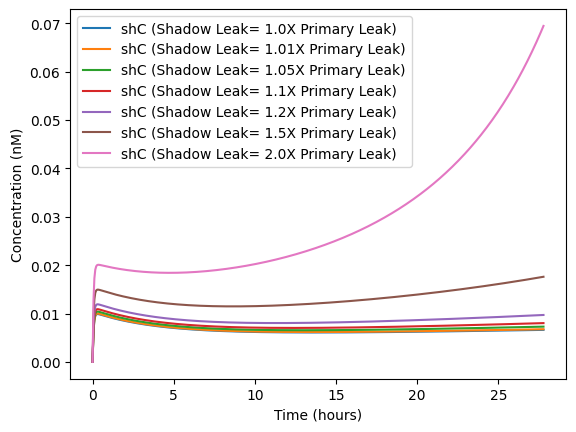

In [338]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0', '1', '5', '10', '20', '50', '100']
labels = [f'{1 + int(pert)/100}X' for pert in perts]
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'shC (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='rps_orig_shadow_cancel_leak',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

## Plot combined

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/0/plots/biamp_orig_shadow_cancel_nocancel_combined.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/1/plots/biamp_orig_shadow_cancel_nocancel_combined.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/5/plots/biamp_orig_shadow_cancel_nocancel_combined.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/10/plots/biamp_orig_shadow_cancel_nocancel_combined.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/20/plots/biamp_orig_shadow_cancel_nocancel_combined.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/50/plots/biamp_orig_shadow_cancel

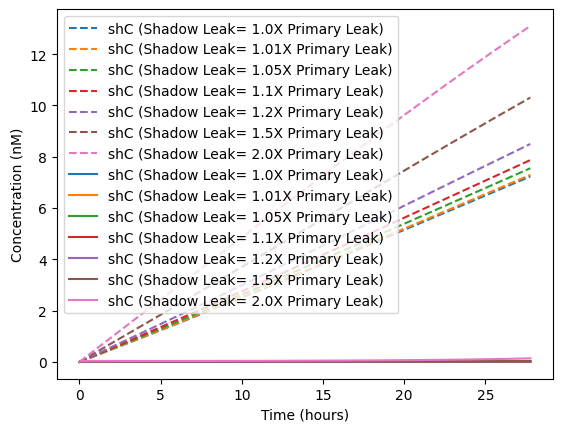

In [339]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0', '1', '5', '10', '20', '50', '100']
labels = [f'{1 + int(pert)/100}X' for pert in perts]
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_nocancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'shC (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_cancel_nocancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
for index, pert in enumerate(perts):
    kwargs={}
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCj']
                   },
                   labels=[f'shC (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_cancel_nocancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)

###  At a particular perturbation plot all the three species

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/20/plots/biamp_orig_shadow_nocancel_1.2X.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/20/plots/biamp_orig_shadow_cancel_1.2X.png


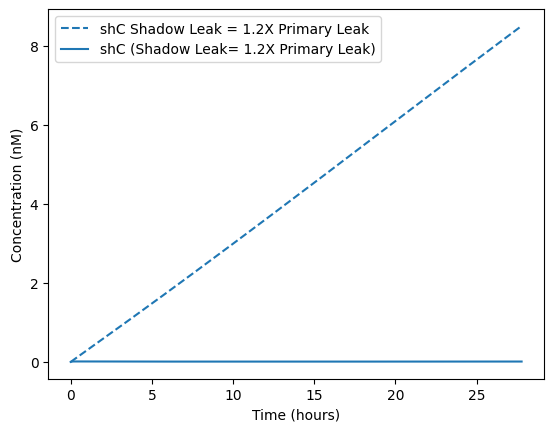

In [340]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['20']
labels = ['1.2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = {
        'shC': ['shCj']
     }

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_nocancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Shadow Leak = {labels[index]} Primary Leak' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'biamp_orig_shadow_nocancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'shC (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name=f'biamp_orig_shadow_cancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/20/plots/biamp_orig_shadow_cancel_1.2X_withprimary.png


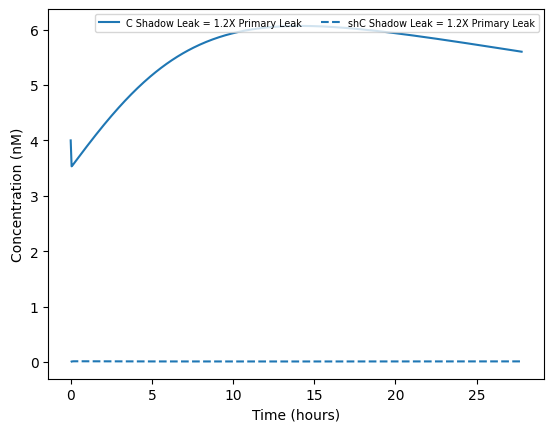

In [342]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['20']
labels = ['1.2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'

Ys = {
        'C': ['Cj'],
        'shC': ['shCj']
     }
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Shadow Leak = {labels[index]} Primary Leak' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid', 'dashed'], 
                   colors=tableau_colors[index:index+len(Ys)//2]*2,
                   name=f'biamp_orig_shadow_cancel_{labels[index]}_withprimary',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)